# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:35:49.989314: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:35:52.919531
2025-04-14 23:35:52.919531


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:35:47"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

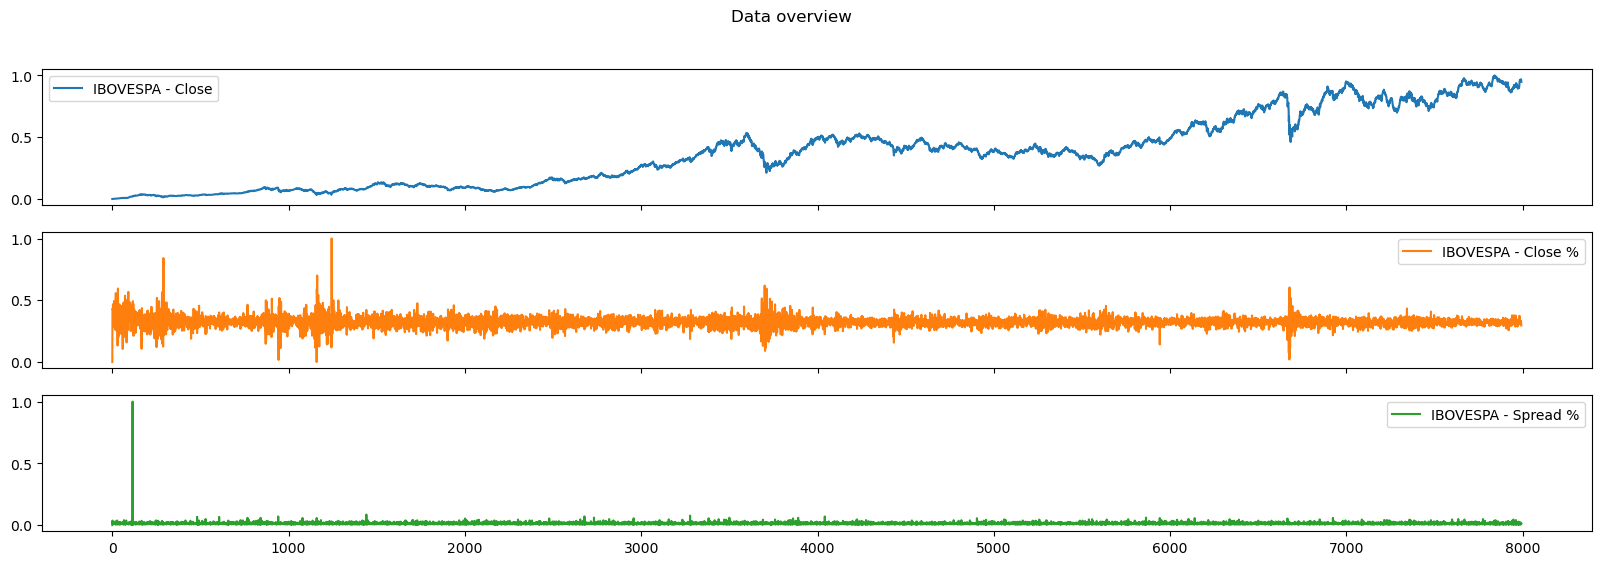

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

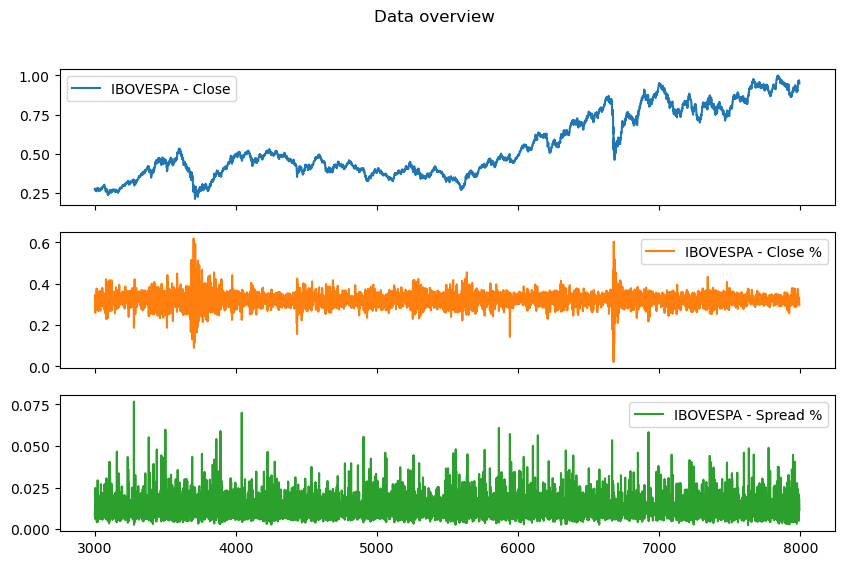

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

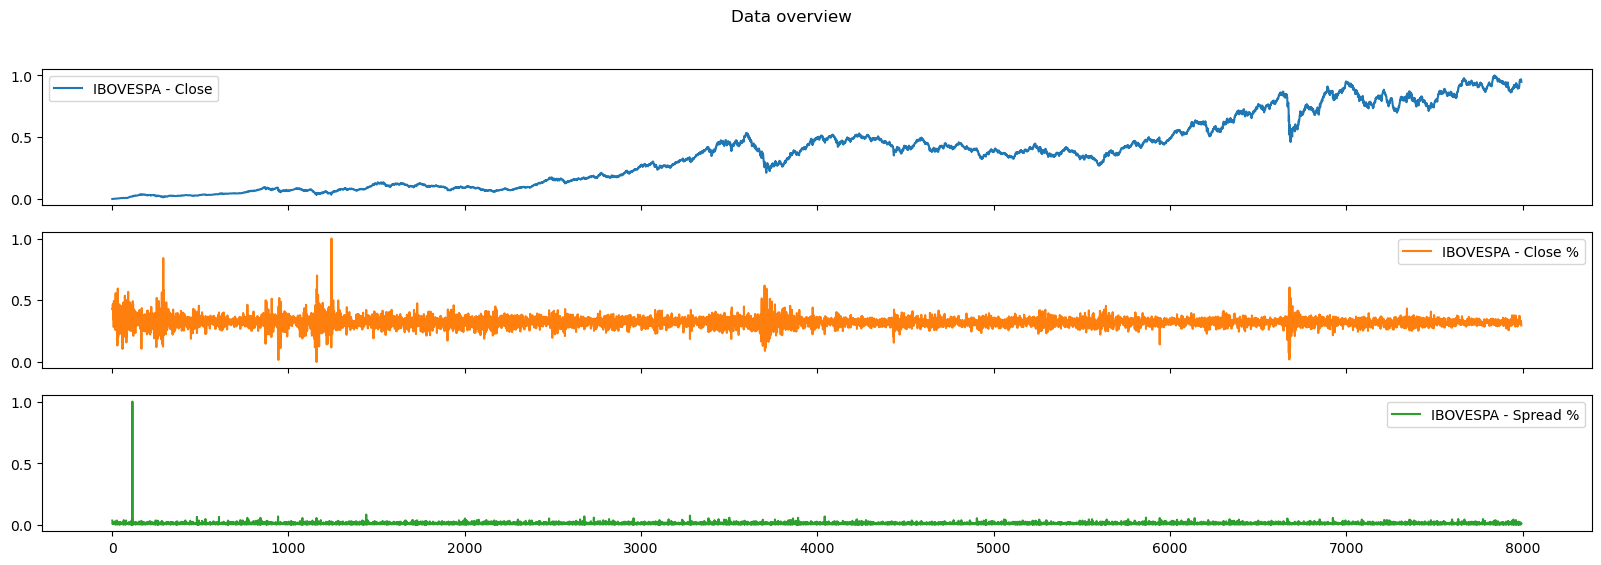

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

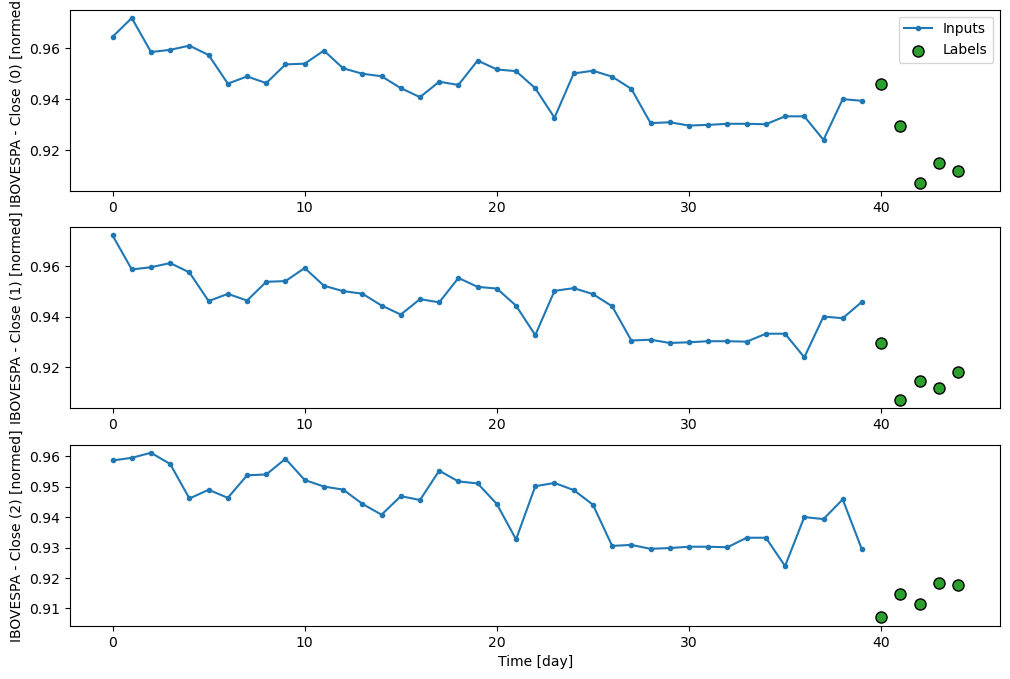

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:10 2s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 86.4168 - mean_squared_error: 1.0532e-04 - root_mean_squared_error: 0.0102 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 75.9695 - mean_squared_error: 1.2992e-04 - root_mean_squared_error: 0.0113

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 69.2971 - mean_squared_error: 1.3512e-04 - root_mean_squared_error: 0.0115

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 63.2239 - mean_squared_error: 1.3021e-04 - root_mean_squared_error: 0.0113

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 58.0607 - mean_squared_error: 1.2326e-04 - root_mean_squared_error: 0.0110

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 53.8757 - mean_squared_error: 1.1821e-04 - root_mean_squared_error: 0.0108

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.6309 - mean_squared_error: 1.1925e-04 - root_mean_squared_error: 0.0108

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.0772 - mean_squared_error: 1.2406e-04 - root_mean_squared_error: 0.0111

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.9692 - mean_squared_error: 1.2827e-04 - root_mean_squared_error: 0.0112

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.2466 - mean_squared_error: 1.3277e-04 - root_mean_squared_error: 0.0114

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.7966 - mean_squared_error: 1.3863e-04 - root_mean_squared_error: 0.0117

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.5554 - mean_squared_error: 1.4840e-04 - root_mean_squared_error: 0.0120

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.3820 - mean_squared_error: 1.5595e-04 - root_mean_squared_error: 0.0123

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 39.2793 - mean_squared_error: 1.6176e-04 - root_mean_squared_error: 0.0125

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 38.2668 - mean_squared_error: 1.6660e-04 - root_mean_squared_error: 0.0127

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 37.3295 - mean_squared_error: 1.7049e-04 - root_mean_squared_error: 0.0129

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 36.4977 - mean_squared_error: 1.7416e-04 - root_mean_squared_error: 0.0130

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 35.7353 - mean_squared_error: 1.7748e-04 - root_mean_squared_error: 0.0131

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 35.0703 - mean_squared_error: 1.8375e-04 - root_mean_squared_error: 0.0133

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 34.4830 - mean_squared_error: 1.9404e-04 - root_mean_squared_error: 0.0137

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 33.9179 - mean_squared_error: 2.0309e-04 - root_mean_squared_error: 0.0139

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 33.3693 - mean_squared_error: 2.1090e-04 - root_mean_squared_error: 0.0142

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 32.8421 - mean_squared_error: 2.1825e-04 - root_mean_squared_error: 0.0144

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 32.3427 - mean_squared_error: 2.2662e-04 - root_mean_squared_error: 0.0147

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 31.8715 - mean_squared_error: 2.3644e-04 - root_mean_squared_error: 0.0150

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 31.4280 - mean_squared_error: 2.4928e-04 - root_mean_squared_error: 0.0153

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 31.0070 - mean_squared_error: 2.6600e-04 - root_mean_squared_error: 0.0157

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 30.7091 - mean_squared_error: 2.8402e-04 - root_mean_squared_error: 0.0161

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 30.3297 - mean_squared_error: 3.0922e-04 - root_mean_squared_error: 0.0166

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 29.9780 - mean_squared_error: 3.3727e-04 - root_mean_squared_error: 0.0172

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 29.6583 - mean_squared_error: 3.7987e-04 - root_mean_squared_error: 0.0180

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 29.3792 - mean_squared_error: 4.5727e-04 - root_mean_squared_error: 0.0191

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 29.1270 - mean_squared_error: 5.4941e-04 - root_mean_squared_error: 0.0203

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 28.8844 - mean_squared_error: 6.3986e-04 - root_mean_squared_error: 0.0215

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 28.6489 - mean_squared_error: 7.2496e-04 - root_mean_squared_error: 0.0226

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 28.4183 - mean_squared_error: 8.0483e-04 - root_mean_squared_error: 0.0236

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 28.1900 - mean_squared_error: 8.7896e-04 - root_mean_squared_error: 0.0246

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 27.9632 - mean_squared_error: 9.4713e-04 - root_mean_squared_error: 0.0255

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 27.7461 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0264    

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 27.5348 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 27.3283 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 27.1253 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0287

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 26.9254 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 26.7333 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0300

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 26.5451 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 26.3644 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0312

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 26.1907 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 26.0240 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0323

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 25.8610 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 25.6990 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 25.5377 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 25.3781 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 25.2272 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 25.0796 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 24.9369 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0361

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 24.7961 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 24.6566 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0372

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 24.5181 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 24.3808 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 24.3132 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384 - val_loss: 0.0908 - val_mean_absolute_error: 0.0908 - val_mean_absolute_percentage_error: 9.6405 - val_mean_squared_error: 0.0089 - val_root_mean_squared_error: 0.0943 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.6540 - mean_absolute_error: 0.6540 - mean_absolute_percentage_error: 8685.5928 - mean_squared_error: 0.4277 - root_mean_squared_error: 0.6540

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6515 - mean_absolute_error: 0.6515 - mean_absolute_percentage_error: 6166.7510 - mean_squared_error: 0.4246 - root_mean_squared_error: 0.6516 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6378 - mean_absolute_error: 0.6378 - mean_absolute_percentage_error: 5015.7432 - mean_squared_error: 0.4078 - root_mean_squared_error: 0.6384

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6124 - mean_absolute_error: 0.6124 - mean_absolute_percentage_error: 4383.1128 - mean_squared_error: 0.3812 - root_mean_squared_error: 0.6162

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5855 - mean_absolute_error: 0.5855 - mean_absolute_percentage_error: 3935.1191 - mean_squared_error: 0.3545 - root_mean_squared_error: 0.5930

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5633 - mean_absolute_error: 0.5633 - mean_absolute_percentage_error: 3596.6797 - mean_squared_error: 0.3325 - root_mean_squared_error: 0.5732

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5434 - mean_absolute_error: 0.5434 - mean_absolute_percentage_error: 3323.7361 - mean_squared_error: 0.3134 - root_mean_squared_error: 0.5553

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5233 - mean_absolute_error: 0.5233 - mean_absolute_percentage_error: 3092.2717 - mean_squared_error: 0.2959 - root_mean_squared_error: 0.5382

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5028 - mean_absolute_error: 0.5028 - mean_absolute_percentage_error: 2892.6829 - mean_squared_error: 0.2797 - root_mean_squared_error: 0.5219

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4825 - mean_absolute_error: 0.4825 - mean_absolute_percentage_error: 2718.8628 - mean_squared_error: 0.2651 - root_mean_squared_error: 0.5066

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2566.5195 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4923

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4452 - mean_absolute_error: 0.4452 - mean_absolute_percentage_error: 2431.9993 - mean_squared_error: 0.2401 - root_mean_squared_error: 0.4791

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4285 - mean_absolute_error: 0.4285 - mean_absolute_percentage_error: 2312.3196 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4668

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4130 - mean_absolute_error: 0.4130 - mean_absolute_percentage_error: 2205.1018 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4554

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - mean_absolute_percentage_error: 2108.4844 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4448

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 2020.9238 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4349

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 1941.1863 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4257

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 1868.2898 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4170

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3529 - mean_absolute_error: 0.3529 - mean_absolute_percentage_error: 1817.5684 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4108

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3427 - mean_absolute_error: 0.3427 - mean_absolute_percentage_error: 1754.6078 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.4030

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1696.3916 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3957

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1642.4121 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3887

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3158 - mean_absolute_error: 0.3158 - mean_absolute_percentage_error: 1592.1749 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3822

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1545.2904 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3759

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1501.4302 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3700

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1460.2881 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3644

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1421.6077 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3590

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1385.1730 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3538

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1350.7825 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3489

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1318.2834 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3443

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1287.5582 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3399

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1258.4219 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3356

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1230.7338 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3316

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1204.3828 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3277

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1179.2701 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3239

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1161.1993 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3212

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1138.0579 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3177

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1115.9299 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3143

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1094.7474 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3110

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1074.4495 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3078

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1054.9789 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.3048

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1036.2853 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.3018

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1018.3212 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2989

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1001.0419 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2961

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 984.4114 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2934 

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 968.3909 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2907

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 952.9483 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2882

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 938.0520 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2857

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 923.6714 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2833

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 909.7780 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2809

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 896.3452 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2786

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 883.3482 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2764

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 870.7651 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2742

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 858.5812 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2721

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 846.7751 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2701

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 835.3279 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2681

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 824.2223 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2661

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 813.4421 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2642

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 802.9727 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2624

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 792.7998 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2606

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 785.3662 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2593 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352 - val_mean_absolute_percentage_error: 3.7128 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0398 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.4581 - mean_absolute_error: 0.4581 - mean_absolute_percentage_error: 6084.5459 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4582

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4556 - mean_absolute_error: 0.4556 - mean_absolute_percentage_error: 4312.6562 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4557

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4507 - mean_absolute_error: 0.4507 - mean_absolute_percentage_error: 3525.5820 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4508

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4438 - mean_absolute_error: 0.4438 - mean_absolute_percentage_error: 3125.4133 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4441

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4344 - mean_absolute_error: 0.4344 - mean_absolute_percentage_error: 2845.6948 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4353

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4219 - mean_absolute_error: 0.4219 - mean_absolute_percentage_error: 2620.7935 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.4245

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 2428.3608 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.4124

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3901 - mean_absolute_error: 0.3901 - mean_absolute_percentage_error: 2262.4692 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.4001

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3738 - mean_absolute_error: 0.3738 - mean_absolute_percentage_error: 2118.5776 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3883

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 1992.9669 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3772

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3433 - mean_absolute_error: 0.3433 - mean_absolute_percentage_error: 1882.6125 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3668

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1808.3018 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3594

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1718.7899 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3502

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1638.6252 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3417

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1566.4137 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3337

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1501.0005 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3263

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1441.4365 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3194

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1386.9584 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.3128

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1336.9286 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.3067

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1290.8027 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.3009

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1248.1343 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2955

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1208.5405 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2903

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1171.6827 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2854

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1137.2711 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2808

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1105.0618 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2764

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1074.8469 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2722

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1046.4381 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2682

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 1019.6733 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2644

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 994.4077 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2607 

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 970.5231 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2572

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 947.9105 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2539

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 926.4621 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2507

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 906.0922 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2476

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 886.7087 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2447

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 868.2391 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2419

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 850.6237 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2392

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 833.7968 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2366

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 817.7014 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2340

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 802.2892 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2316

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 787.5182 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2292

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 773.3461 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2270

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 759.7378 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2248

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 746.6580 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2226

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 734.0743 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2205

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 721.9618 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2185

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 710.2905 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2166

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 699.0378 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2147

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 688.1785 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2128

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 680.2787 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2115

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 670.0567 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2097

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 660.1736 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2080

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 650.6130 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2063

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 641.3573 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2047

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 632.3944 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2031

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 623.7085 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2016

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 615.2883 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2001

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 607.1197 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.1987

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 599.1909 - mean_squared_error: 0.0471 - root_mean_squared_error: 0.1973

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 591.4905 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1959

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 584.0082 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1946

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 578.5405 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1936 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4237 - val_mean_squared_error: 2.9655e-04 - val_root_mean_squared_error: 0.0172 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 3434.0520 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2591

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 2418.6802 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2546

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1952.0455 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2462

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1689.5514 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2349

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1494.1097 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2226

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 1346.5559 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2119

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 1228.1826 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.2024

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 1131.1135 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1939

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 1049.8331 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1864

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 980.7700 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1798 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 921.3018 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1738

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 869.4590 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1683

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 823.8135 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1634

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 783.2685 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1589

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 755.6984 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1557

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 738.5054 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1537

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 722.1770 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1518

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 706.6469 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1500

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 691.8560 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1482

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 677.7521 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1465

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 664.2870 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1449

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 651.4146 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1433

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 639.0936 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1417

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 627.2880 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1403

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 610.4749 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1381

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 599.8216 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1367

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 584.6068 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1348

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 565.6250 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1323

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 547.9832 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1299

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 531.5378 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1277

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 516.1675 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1256

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 501.7652 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1235

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 488.2385 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1216

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 475.5070 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1198

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 463.5002 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1181

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 452.1596 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1164

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 441.4287 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1149

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 431.2576 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1134

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 421.6010 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1119

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 412.4184 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1105

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 403.6736 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1092

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 395.3351 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1079

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 387.3738 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1067

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 379.7632 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1055

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 372.4799 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1044

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 365.5026 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1033

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 358.8113 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1022

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 352.3889 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1011

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 346.2188 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1001

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 341.7473 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0994

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 338.8375 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0989

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 335.9829 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0985

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 331.8007 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0978

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 327.7333 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0971

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 323.7761 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0964

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 321.1969 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0960

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 318.6635 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0956

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 314.9463 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0949

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 310.1390 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0941

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 306.6399 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0935

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 303.2280 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0929

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 299.8996 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0924

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 296.6524 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0918

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 293.4831 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0913

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 290.3889 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0908

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 287.3667 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0902

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 284.4142 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0897

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 281.5288 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0892

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 277.7823 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0886

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 275.0448 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0881

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 272.3672 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0877

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 268.8893 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0871 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328 - val_mean_absolute_percentage_error: 3.4787 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0357 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1278.8058 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0968

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 964.3970 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0940  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 774.3323 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 654.8887 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 576.5565 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 519.0579 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 473.6679 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0703

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 436.8423 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0674

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 406.0546 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0648

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 379.8336 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0625

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 357.2060 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0604

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 331.3883 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0580

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 314.6761 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 299.7950 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0548

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 286.4479 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 274.4002 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 266.9972 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0514

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 256.7090 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 247.2883 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 238.6250 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 230.6320 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 223.2309 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 216.3626 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 209.9694 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 203.9978 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 198.4029 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 193.1482 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 188.2033 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 182.0411 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 177.7124 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 172.2923 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 167.2350 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 163.6577 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 160.2496 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 158.0652 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 155.9476 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 152.8894 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 149.9643 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 148.0845 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 146.2586 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 142.7569 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 139.4400 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 136.2927 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.3018 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 130.4552 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.7432 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 125.1564 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.6860 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.3230 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 118.0606 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 115.8920 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 113.8118 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 111.8150 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 109.8956 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 108.0496 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 106.2726 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 104.9825 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.7274 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.5059 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.9270 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.4028 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300 

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 98.2937 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 97.2123 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.5062 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 95.4689 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.4569 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.1449 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 92.1877 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 91.2525 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 90.6410 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 89.7411 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 88.8612 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 88.0007 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 86.8830 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 86.6092 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316 - val_mean_absolute_percentage_error: 3.3522 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0342 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 1012.0947 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0765

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 839.8784 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0758  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 656.5314 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0719

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 519.8224 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 459.4727 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 414.4293 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 379.1593 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 342.0349 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 312.5198 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0508

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 288.2846 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0487

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 267.9672 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 250.7387 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 235.9246 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 223.0248 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 211.6628 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 201.5643 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 192.5172 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 184.3658 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 176.9821 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 170.2671 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 164.1212 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 158.4666 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 153.2456 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 148.4045 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 143.9023 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 139.7032 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 135.7778 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 132.0977 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 128.6392 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 125.3824 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 122.3094 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 119.4074 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 116.6594 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 114.0519 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.5742 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 109.2156 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 106.9677 - mean_squared_error: 9.8627e-04 - root_mean_squared_error: 0.0286

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 104.8228 - mean_squared_error: 9.6876e-04 - root_mean_squared_error: 0.0284

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 102.7736 - mean_squared_error: 9.5206e-04 - root_mean_squared_error: 0.0281

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 100.8137 - mean_squared_error: 9.3609e-04 - root_mean_squared_error: 0.0279

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 98.9373 - mean_squared_error: 9.2080e-04 - root_mean_squared_error: 0.0276 

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 97.1386 - mean_squared_error: 9.0612e-04 - root_mean_squared_error: 0.0274

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 95.4126 - mean_squared_error: 8.9200e-04 - root_mean_squared_error: 0.0272

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 93.7552 - mean_squared_error: 8.7845e-04 - root_mean_squared_error: 0.0269

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 92.1621 - mean_squared_error: 8.6541e-04 - root_mean_squared_error: 0.0267

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 90.6295 - mean_squared_error: 8.5286e-04 - root_mean_squared_error: 0.0265

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 89.1542 - mean_squared_error: 8.4080e-04 - root_mean_squared_error: 0.0263

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 87.7325 - mean_squared_error: 8.2917e-04 - root_mean_squared_error: 0.0261

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 86.3613 - mean_squared_error: 8.1795e-04 - root_mean_squared_error: 0.0260

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 85.0378 - mean_squared_error: 8.0712e-04 - root_mean_squared_error: 0.0258

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 83.7595 - mean_squared_error: 7.9668e-04 - root_mean_squared_error: 0.0256

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 82.5242 - mean_squared_error: 7.8665e-04 - root_mean_squared_error: 0.0254

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 81.3297 - mean_squared_error: 7.7703e-04 - root_mean_squared_error: 0.0253

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 80.1738 - mean_squared_error: 7.6778e-04 - root_mean_squared_error: 0.0251

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 79.0559 - mean_squared_error: 7.5954e-04 - root_mean_squared_error: 0.0250

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 77.9734 - mean_squared_error: 7.5185e-04 - root_mean_squared_error: 0.0249

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 76.9247 - mean_squared_error: 7.4478e-04 - root_mean_squared_error: 0.0248

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 75.9084 - mean_squared_error: 7.3840e-04 - root_mean_squared_error: 0.0247

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 74.9224 - mean_squared_error: 7.3239e-04 - root_mean_squared_error: 0.0246

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 73.9654 - mean_squared_error: 7.2666e-04 - root_mean_squared_error: 0.0245

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 73.0362 - mean_squared_error: 7.2124e-04 - root_mean_squared_error: 0.0244

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 72.3574 - mean_squared_error: 7.1734e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.4540 - val_mean_squared_error: 2.9332e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 407.6956 - mean_squared_error: 9.5830e-04 - root_mean_squared_error: 0.0310

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 268.6995 - mean_squared_error: 7.3911e-04 - root_mean_squared_error: 0.0270

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 207.1019 - mean_squared_error: 6.0402e-04 - root_mean_squared_error: 0.0243

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 175.6919 - mean_squared_error: 5.3177e-04 - root_mean_squared_error: 0.0227

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 155.3559 - mean_squared_error: 4.8356e-04 - root_mean_squared_error: 0.0216

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 139.9831 - mean_squared_error: 4.4343e-04 - root_mean_squared_error: 0.0206

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 127.7855 - mean_squared_error: 4.0971e-04 - root_mean_squared_error: 0.0198

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 117.8000 - mean_squared_error: 3.8131e-04 - root_mean_squared_error: 0.0190

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 109.4749 - mean_squared_error: 3.5716e-04 - root_mean_squared_error: 0.0184

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 102.4686 - mean_squared_error: 3.3663e-04 - root_mean_squared_error: 0.0178

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 96.5127 - mean_squared_error: 3.1916e-04 - root_mean_squared_error: 0.0173 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 91.3544 - mean_squared_error: 3.0413e-04 - root_mean_squared_error: 0.0168

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 86.8269 - mean_squared_error: 2.9112e-04 - root_mean_squared_error: 0.0164

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 82.7983 - mean_squared_error: 2.7947e-04 - root_mean_squared_error: 0.0161

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 79.1896 - mean_squared_error: 2.6898e-04 - root_mean_squared_error: 0.0157

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 75.9371 - mean_squared_error: 2.5942e-04 - root_mean_squared_error: 0.0154

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.9917 - mean_squared_error: 2.5070e-04 - root_mean_squared_error: 0.0152

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 70.3194 - mean_squared_error: 2.4275e-04 - root_mean_squared_error: 0.0149

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.8808 - mean_squared_error: 2.3547e-04 - root_mean_squared_error: 0.0146

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.6394 - mean_squared_error: 2.2879e-04 - root_mean_squared_error: 0.0144

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.5699 - mean_squared_error: 2.2273e-04 - root_mean_squared_error: 0.0142

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.6477 - mean_squared_error: 2.1706e-04 - root_mean_squared_error: 0.0140

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 59.8571 - mean_squared_error: 2.1177e-04 - root_mean_squared_error: 0.0138

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.1848 - mean_squared_error: 2.0685e-04 - root_mean_squared_error: 0.0137

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.6192 - mean_squared_error: 2.0234e-04 - root_mean_squared_error: 0.0135

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.1505 - mean_squared_error: 1.9819e-04 - root_mean_squared_error: 0.0134

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.7683 - mean_squared_error: 1.9438e-04 - root_mean_squared_error: 0.0132

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.4657 - mean_squared_error: 1.9101e-04 - root_mean_squared_error: 0.0131

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.2356 - mean_squared_error: 1.8805e-04 - root_mean_squared_error: 0.0130

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.0742 - mean_squared_error: 1.8569e-04 - root_mean_squared_error: 0.0130

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.9755 - mean_squared_error: 1.8367e-04 - root_mean_squared_error: 0.0129

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.9324 - mean_squared_error: 1.8185e-04 - root_mean_squared_error: 0.0128

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.9403 - mean_squared_error: 1.8018e-04 - root_mean_squared_error: 0.0128

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.9950 - mean_squared_error: 1.7863e-04 - root_mean_squared_error: 0.0128

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.0931 - mean_squared_error: 1.7715e-04 - root_mean_squared_error: 0.0127

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.2320 - mean_squared_error: 1.7579e-04 - root_mean_squared_error: 0.0127

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.4087 - mean_squared_error: 1.7452e-04 - root_mean_squared_error: 0.0126

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.6207 - mean_squared_error: 1.7331e-04 - root_mean_squared_error: 0.0126

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.8654 - mean_squared_error: 1.7214e-04 - root_mean_squared_error: 0.0126

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.1409 - mean_squared_error: 1.7100e-04 - root_mean_squared_error: 0.0125

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.4451 - mean_squared_error: 1.6988e-04 - root_mean_squared_error: 0.0125

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.7764 - mean_squared_error: 1.6880e-04 - root_mean_squared_error: 0.0125

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.1334 - mean_squared_error: 1.6778e-04 - root_mean_squared_error: 0.0124

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.5144 - mean_squared_error: 1.6678e-04 - root_mean_squared_error: 0.0124

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 37.9184 - mean_squared_error: 1.6584e-04 - root_mean_squared_error: 0.0124

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 37.3440 - mean_squared_error: 1.6495e-04 - root_mean_squared_error: 0.0124

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 36.7897 - mean_squared_error: 1.6411e-04 - root_mean_squared_error: 0.0123

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 36.2545 - mean_squared_error: 1.6332e-04 - root_mean_squared_error: 0.0123

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 35.7372 - mean_squared_error: 1.6257e-04 - root_mean_squared_error: 0.0123

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 35.2372 - mean_squared_error: 1.6192e-04 - root_mean_squared_error: 0.0123

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 34.7536 - mean_squared_error: 1.6140e-04 - root_mean_squared_error: 0.0123

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 34.2855 - mean_squared_error: 1.6096e-04 - root_mean_squared_error: 0.0123

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 33.8324 - mean_squared_error: 1.6086e-04 - root_mean_squared_error: 0.0123

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 33.3940 - mean_squared_error: 1.6116e-04 - root_mean_squared_error: 0.0123

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 32.9693 - mean_squared_error: 1.6175e-04 - root_mean_squared_error: 0.0123

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 32.5575 - mean_squared_error: 1.6253e-04 - root_mean_squared_error: 0.0123

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 32.1581 - mean_squared_error: 1.6354e-04 - root_mean_squared_error: 0.0124

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 31.7705 - mean_squared_error: 1.6471e-04 - root_mean_squared_error: 0.0124

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 31.3941 - mean_squared_error: 1.6599e-04 - root_mean_squared_error: 0.0125

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 31.0287 - mean_squared_error: 1.6746e-04 - root_mean_squared_error: 0.0125

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 30.9392 - mean_squared_error: 1.6783e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157 - val_mean_absolute_percentage_error: 1.6624 - val_mean_squared_error: 3.6210e-04 - val_root_mean_squared_error: 0.0190 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 585.6947 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 401.2286 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0427

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 308.8098 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 261.9034 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 229.7089 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 205.7088 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 186.8954 - mean_squared_error: 9.6058e-04 - root_mean_squared_error: 0.0301

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 171.7471 - mean_squared_error: 8.8721e-04 - root_mean_squared_error: 0.0288

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 159.3438 - mean_squared_error: 8.2795e-04 - root_mean_squared_error: 0.0277

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 148.9136 - mean_squared_error: 7.7750e-04 - root_mean_squared_error: 0.0268

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 142.1034 - mean_squared_error: 7.4419e-04 - root_mean_squared_error: 0.0261

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 134.0850 - mean_squared_error: 7.0465e-04 - root_mean_squared_error: 0.0254

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 127.0634 - mean_squared_error: 6.6999e-04 - root_mean_squared_error: 0.0247

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 120.8525 - mean_squared_error: 6.3930e-04 - root_mean_squared_error: 0.0240

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 115.3123 - mean_squared_error: 6.1183e-04 - root_mean_squared_error: 0.0235

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 110.3394 - mean_squared_error: 5.8707e-04 - root_mean_squared_error: 0.0229

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 105.8541 - mean_squared_error: 5.6466e-04 - root_mean_squared_error: 0.0224

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 101.7923 - mean_squared_error: 5.4431e-04 - root_mean_squared_error: 0.0220

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.0980 - mean_squared_error: 5.2576e-04 - root_mean_squared_error: 0.0216 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.7100 - mean_squared_error: 5.0871e-04 - root_mean_squared_error: 0.0212

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.5856 - mean_squared_error: 4.9302e-04 - root_mean_squared_error: 0.0208

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.6925 - mean_squared_error: 4.7847e-04 - root_mean_squared_error: 0.0205

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.0035 - mean_squared_error: 4.6494e-04 - root_mean_squared_error: 0.0202

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.4984 - mean_squared_error: 4.5238e-04 - root_mean_squared_error: 0.0199

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 81.1590 - mean_squared_error: 4.4081e-04 - root_mean_squared_error: 0.0196

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 78.9703 - mean_squared_error: 4.3027e-04 - root_mean_squared_error: 0.0193

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.9153 - mean_squared_error: 4.2053e-04 - root_mean_squared_error: 0.0191

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.9818 - mean_squared_error: 4.1165e-04 - root_mean_squared_error: 0.0189

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.1588 - mean_squared_error: 4.0362e-04 - root_mean_squared_error: 0.0187

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.4375 - mean_squared_error: 3.9636e-04 - root_mean_squared_error: 0.0185

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.8103 - mean_squared_error: 3.8978e-04 - root_mean_squared_error: 0.0184

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.2681 - mean_squared_error: 3.8371e-04 - root_mean_squared_error: 0.0183

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.8032 - mean_squared_error: 3.7807e-04 - root_mean_squared_error: 0.0181

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.4099 - mean_squared_error: 3.7282e-04 - root_mean_squared_error: 0.0180

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.0820 - mean_squared_error: 3.6783e-04 - root_mean_squared_error: 0.0179

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.8154 - mean_squared_error: 3.6312e-04 - root_mean_squared_error: 0.0178

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.6058 - mean_squared_error: 3.5866e-04 - root_mean_squared_error: 0.0177

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.4497 - mean_squared_error: 3.5448e-04 - root_mean_squared_error: 0.0176

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.3431 - mean_squared_error: 3.5050e-04 - root_mean_squared_error: 0.0175

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.2827 - mean_squared_error: 3.4669e-04 - root_mean_squared_error: 0.0174

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.2650 - mean_squared_error: 3.4298e-04 - root_mean_squared_error: 0.0174

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.2876 - mean_squared_error: 3.3939e-04 - root_mean_squared_error: 0.0173

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.3485 - mean_squared_error: 3.3596e-04 - root_mean_squared_error: 0.0172

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.4450 - mean_squared_error: 3.3263e-04 - root_mean_squared_error: 0.0171

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.5753 - mean_squared_error: 3.2941e-04 - root_mean_squared_error: 0.0170

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.7373 - mean_squared_error: 3.2631e-04 - root_mean_squared_error: 0.0170

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 51.9291 - mean_squared_error: 3.2331e-04 - root_mean_squared_error: 0.0169

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 51.1489 - mean_squared_error: 3.2040e-04 - root_mean_squared_error: 0.0168

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 50.5812 - mean_squared_error: 3.1828e-04 - root_mean_squared_error: 0.0168

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 49.8465 - mean_squared_error: 3.1554e-04 - root_mean_squared_error: 0.0167

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 49.1361 - mean_squared_error: 3.1292e-04 - root_mean_squared_error: 0.0167

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 48.4487 - mean_squared_error: 3.1042e-04 - root_mean_squared_error: 0.0166

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 47.7829 - mean_squared_error: 3.0802e-04 - root_mean_squared_error: 0.0165

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 47.1389 - mean_squared_error: 3.0623e-04 - root_mean_squared_error: 0.0165

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 46.5148 - mean_squared_error: 3.0459e-04 - root_mean_squared_error: 0.0165

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 45.9096 - mean_squared_error: 3.0311e-04 - root_mean_squared_error: 0.0164

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 45.3225 - mean_squared_error: 3.0174e-04 - root_mean_squared_error: 0.0164

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 44.7527 - mean_squared_error: 3.0053e-04 - root_mean_squared_error: 0.0164

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 44.1994 - mean_squared_error: 2.9941e-04 - root_mean_squared_error: 0.0164

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 43.6617 - mean_squared_error: 2.9837e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 43.2687 - mean_squared_error: 2.9762e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0546 - val_mean_squared_error: 1.6061e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 277.7421 - mean_squared_error: 5.1563e-04 - root_mean_squared_error: 0.0227

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 173.7776 - mean_squared_error: 3.5552e-04 - root_mean_squared_error: 0.0187

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 132.4891 - mean_squared_error: 2.8312e-04 - root_mean_squared_error: 0.0165

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 111.0691 - mean_squared_error: 2.4202e-04 - root_mean_squared_error: 0.0152

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 97.0143 - mean_squared_error: 2.1381e-04 - root_mean_squared_error: 0.0142 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 86.7760 - mean_squared_error: 1.9263e-04 - root_mean_squared_error: 0.0134

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 78.8457 - mean_squared_error: 1.7601e-04 - root_mean_squared_error: 0.0128

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 72.4571 - mean_squared_error: 1.6279e-04 - root_mean_squared_error: 0.0123

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 67.2098 - mean_squared_error: 1.5204e-04 - root_mean_squared_error: 0.0118

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 62.8355 - mean_squared_error: 1.4308e-04 - root_mean_squared_error: 0.0114

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 59.1454 - mean_squared_error: 1.3565e-04 - root_mean_squared_error: 0.0111

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 55.9630 - mean_squared_error: 1.2934e-04 - root_mean_squared_error: 0.0109

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 53.1717 - mean_squared_error: 1.2389e-04 - root_mean_squared_error: 0.0106

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 50.6922 - mean_squared_error: 1.1902e-04 - root_mean_squared_error: 0.0104

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 48.4763 - mean_squared_error: 1.1467e-04 - root_mean_squared_error: 0.0102

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 46.4834 - mean_squared_error: 1.1073e-04 - root_mean_squared_error: 0.0100

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 44.6850 - mean_squared_error: 1.0717e-04 - root_mean_squared_error: 0.0098

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 43.0582 - mean_squared_error: 1.0396e-04 - root_mean_squared_error: 0.0097

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 41.5724 - mean_squared_error: 1.0100e-04 - root_mean_squared_error: 0.0095

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 40.2066 - mean_squared_error: 9.8268e-05 - root_mean_squared_error: 0.0094

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 38.9487 - mean_squared_error: 9.5865e-05 - root_mean_squared_error: 0.0093

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 37.7829 - mean_squared_error: 9.3661e-05 - root_mean_squared_error: 0.0092

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 36.6990 - mean_squared_error: 9.1648e-05 - root_mean_squared_error: 0.0091

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 35.6874 - mean_squared_error: 8.9795e-05 - root_mean_squared_error: 0.0090

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 34.7411 - mean_squared_error: 8.8162e-05 - root_mean_squared_error: 0.0089

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 33.8537 - mean_squared_error: 8.6713e-05 - root_mean_squared_error: 0.0088

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 33.0187 - mean_squared_error: 8.5420e-05 - root_mean_squared_error: 0.0088

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 32.2320 - mean_squared_error: 8.4378e-05 - root_mean_squared_error: 0.0087

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 31.4895 - mean_squared_error: 8.3622e-05 - root_mean_squared_error: 0.0087

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 30.7902 - mean_squared_error: 8.3374e-05 - root_mean_squared_error: 0.0087

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 30.1297 - mean_squared_error: 8.3396e-05 - root_mean_squared_error: 0.0087

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 29.5039 - mean_squared_error: 8.3645e-05 - root_mean_squared_error: 0.0088

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 28.9096 - mean_squared_error: 8.4090e-05 - root_mean_squared_error: 0.0088

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 28.3438 - mean_squared_error: 8.4627e-05 - root_mean_squared_error: 0.0088

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 27.8041 - mean_squared_error: 8.5176e-05 - root_mean_squared_error: 0.0089

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 27.2896 - mean_squared_error: 8.5832e-05 - root_mean_squared_error: 0.0089

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 26.9191 - mean_squared_error: 8.6372e-05 - root_mean_squared_error: 0.0089

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 26.4436 - mean_squared_error: 8.7065e-05 - root_mean_squared_error: 0.0090

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 25.9877 - mean_squared_error: 8.7693e-05 - root_mean_squared_error: 0.0090

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 25.5504 - mean_squared_error: 8.8280e-05 - root_mean_squared_error: 0.0091

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 25.1306 - mean_squared_error: 8.8811e-05 - root_mean_squared_error: 0.0091

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 24.7271 - mean_squared_error: 8.9312e-05 - root_mean_squared_error: 0.0091

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 24.3395 - mean_squared_error: 8.9823e-05 - root_mean_squared_error: 0.0092

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 23.9663 - mean_squared_error: 9.0292e-05 - root_mean_squared_error: 0.0092

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 23.6071 - mean_squared_error: 9.0750e-05 - root_mean_squared_error: 0.0092

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 23.2614 - mean_squared_error: 9.1242e-05 - root_mean_squared_error: 0.0093

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 22.9279 - mean_squared_error: 9.1741e-05 - root_mean_squared_error: 0.0093

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 22.6061 - mean_squared_error: 9.2262e-05 - root_mean_squared_error: 0.0093

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 22.2954 - mean_squared_error: 9.2811e-05 - root_mean_squared_error: 0.0094

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 21.9953 - mean_squared_error: 9.3479e-05 - root_mean_squared_error: 0.0094

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 21.7054 - mean_squared_error: 9.4269e-05 - root_mean_squared_error: 0.0094

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 21.4247 - mean_squared_error: 9.5131e-05 - root_mean_squared_error: 0.0095

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 21.1530 - mean_squared_error: 9.6127e-05 - root_mean_squared_error: 0.0095

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 20.8903 - mean_squared_error: 9.7519e-05 - root_mean_squared_error: 0.0096

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 20.6356 - mean_squared_error: 9.8985e-05 - root_mean_squared_error: 0.0097

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 20.3886 - mean_squared_error: 1.0050e-04 - root_mean_squared_error: 0.0097

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 20.1488 - mean_squared_error: 1.0208e-04 - root_mean_squared_error: 0.0098

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 19.9161 - mean_squared_error: 1.0375e-04 - root_mean_squared_error: 0.0099

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 19.6900 - mean_squared_error: 1.0545e-04 - root_mean_squared_error: 0.0100

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 19.4703 - mean_squared_error: 1.0721e-04 - root_mean_squared_error: 0.0100

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 19.3630 - mean_squared_error: 1.0809e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0733 - val_mean_squared_error: 1.6683e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 920.6215 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0704

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 635.5583 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0663

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 517.4404 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0614

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 444.8610 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 396.7393 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 359.8849 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 322.1027 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0491

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 292.5641 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0467

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 268.6043 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 248.7087 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 231.9144 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 217.5567 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 208.0631 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 196.8036 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 186.8653 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 178.0193 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 170.0853 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 162.9255 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 156.4302 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 150.5080 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 145.0776 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 140.0785 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 135.4600 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 131.1771 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 127.1935 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 123.4768 - mean_squared_error: 9.9935e-04 - root_mean_squared_error: 0.0290

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 120.0003 - mean_squared_error: 9.7189e-04 - root_mean_squared_error: 0.0286

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 116.7394 - mean_squared_error: 9.4618e-04 - root_mean_squared_error: 0.0282

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 113.6744 - mean_squared_error: 9.2217e-04 - root_mean_squared_error: 0.0278

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 110.7879 - mean_squared_error: 8.9979e-04 - root_mean_squared_error: 0.0274

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.0655 - mean_squared_error: 8.7901e-04 - root_mean_squared_error: 0.0270

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.4939 - mean_squared_error: 8.5963e-04 - root_mean_squared_error: 0.0267

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.0583 - mean_squared_error: 8.4134e-04 - root_mean_squared_error: 0.0264

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.7472 - mean_squared_error: 8.2405e-04 - root_mean_squared_error: 0.0261

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.5508 - mean_squared_error: 8.0766e-04 - root_mean_squared_error: 0.0258 

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.4603 - mean_squared_error: 7.9207e-04 - root_mean_squared_error: 0.0255

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.4683 - mean_squared_error: 7.7725e-04 - root_mean_squared_error: 0.0253

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.5679 - mean_squared_error: 7.6318e-04 - root_mean_squared_error: 0.0250

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.7527 - mean_squared_error: 7.4978e-04 - root_mean_squared_error: 0.0248

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 89.0165 - mean_squared_error: 7.3695e-04 - root_mean_squared_error: 0.0246

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.3542 - mean_squared_error: 7.2467e-04 - root_mean_squared_error: 0.0244

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.1529 - mean_squared_error: 7.1579e-04 - root_mean_squared_error: 0.0242

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.6083 - mean_squared_error: 7.0435e-04 - root_mean_squared_error: 0.0240

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.1257 - mean_squared_error: 6.9342e-04 - root_mean_squared_error: 0.0238

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.7011 - mean_squared_error: 6.8291e-04 - root_mean_squared_error: 0.0236

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.3311 - mean_squared_error: 6.7280e-04 - root_mean_squared_error: 0.0234

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.0128 - mean_squared_error: 6.6312e-04 - root_mean_squared_error: 0.0232

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.7429 - mean_squared_error: 6.5382e-04 - root_mean_squared_error: 0.0231

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.5185 - mean_squared_error: 6.4487e-04 - root_mean_squared_error: 0.0229

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.3372 - mean_squared_error: 6.3626e-04 - root_mean_squared_error: 0.0228

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.1967 - mean_squared_error: 6.2801e-04 - root_mean_squared_error: 0.0226

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.0951 - mean_squared_error: 6.2016e-04 - root_mean_squared_error: 0.0225

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.0302 - mean_squared_error: 6.1267e-04 - root_mean_squared_error: 0.0223

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.0000 - mean_squared_error: 6.0550e-04 - root_mean_squared_error: 0.0222

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.0036 - mean_squared_error: 5.9907e-04 - root_mean_squared_error: 0.0221

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.0387 - mean_squared_error: 5.9298e-04 - root_mean_squared_error: 0.0220

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.1038 - mean_squared_error: 5.8720e-04 - root_mean_squared_error: 0.0219

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.1973 - mean_squared_error: 5.8173e-04 - root_mean_squared_error: 0.0218

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 66.3182 - mean_squared_error: 5.7657e-04 - root_mean_squared_error: 0.0217

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.4649 - mean_squared_error: 5.7165e-04 - root_mean_squared_error: 0.0216

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.6363 - mean_squared_error: 5.6695e-04 - root_mean_squared_error: 0.0215

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.0312 - mean_squared_error: 5.6357e-04 - root_mean_squared_error: 0.0215 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0706 - val_mean_squared_error: 1.5650e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 595.0702 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 402.3399 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 307.8840 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 260.5891 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 228.4053 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 21/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 204.7657 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 186.4331 - mean_squared_error: 9.2370e-04 - root_mean_squared_error: 0.0295

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 171.5683 - mean_squared_error: 8.5573e-04 - root_mean_squared_error: 0.0283

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 159.2434 - mean_squared_error: 7.9877e-04 - root_mean_squared_error: 0.0273

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 148.8312 - mean_squared_error: 7.4989e-04 - root_mean_squared_error: 0.0263

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 139.9044 - mean_squared_error: 7.0740e-04 - root_mean_squared_error: 0.0255

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 133.9767 - mean_squared_error: 6.7893e-04 - root_mean_squared_error: 0.0249

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 126.9221 - mean_squared_error: 6.4493e-04 - root_mean_squared_error: 0.0242

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 120.6811 - mean_squared_error: 6.1479e-04 - root_mean_squared_error: 0.0236

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 115.1128 - mean_squared_error: 5.8780e-04 - root_mean_squared_error: 0.0230

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 110.1117 - mean_squared_error: 5.6344e-04 - root_mean_squared_error: 0.0224

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.5955 - mean_squared_error: 5.4135e-04 - root_mean_squared_error: 0.0219

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.4994 - mean_squared_error: 5.2124e-04 - root_mean_squared_error: 0.0215

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 97.7654 - mean_squared_error: 5.0284e-04 - root_mean_squared_error: 0.0211 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.3403 - mean_squared_error: 4.8592e-04 - root_mean_squared_error: 0.0207

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.1852 - mean_squared_error: 4.7040e-04 - root_mean_squared_error: 0.0203

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.2656 - mean_squared_error: 4.5605e-04 - root_mean_squared_error: 0.0199

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.5541 - mean_squared_error: 4.4272e-04 - root_mean_squared_error: 0.0196

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.0286 - mean_squared_error: 4.3033e-04 - root_mean_squared_error: 0.0193

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.6693 - mean_squared_error: 4.1879e-04 - root_mean_squared_error: 0.0190

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.4597 - mean_squared_error: 4.0804e-04 - root_mean_squared_error: 0.0187

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.3846 - mean_squared_error: 3.9799e-04 - root_mean_squared_error: 0.0185

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.4323 - mean_squared_error: 3.8867e-04 - root_mean_squared_error: 0.0183

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.5923 - mean_squared_error: 3.8011e-04 - root_mean_squared_error: 0.0180

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.8561 - mean_squared_error: 3.7237e-04 - root_mean_squared_error: 0.0178

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.2161 - mean_squared_error: 3.6535e-04 - root_mean_squared_error: 0.0177

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.6619 - mean_squared_error: 3.5878e-04 - root_mean_squared_error: 0.0175

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.1860 - mean_squared_error: 3.5261e-04 - root_mean_squared_error: 0.0174

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.7824 - mean_squared_error: 3.4680e-04 - root_mean_squared_error: 0.0172

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.4455 - mean_squared_error: 3.4128e-04 - root_mean_squared_error: 0.0171

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.1708 - mean_squared_error: 3.3606e-04 - root_mean_squared_error: 0.0170

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.9542 - mean_squared_error: 3.3117e-04 - root_mean_squared_error: 0.0168

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.7918 - mean_squared_error: 3.2655e-04 - root_mean_squared_error: 0.0167

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.6791 - mean_squared_error: 3.2212e-04 - root_mean_squared_error: 0.0166

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.6133 - mean_squared_error: 3.1787e-04 - root_mean_squared_error: 0.0165

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.5909 - mean_squared_error: 3.1377e-04 - root_mean_squared_error: 0.0164

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.6097 - mean_squared_error: 3.0985e-04 - root_mean_squared_error: 0.0163

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.6676 - mean_squared_error: 3.0615e-04 - root_mean_squared_error: 0.0162

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.7616 - mean_squared_error: 3.0258e-04 - root_mean_squared_error: 0.0161

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.8899 - mean_squared_error: 2.9916e-04 - root_mean_squared_error: 0.0160

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.0505 - mean_squared_error: 2.9590e-04 - root_mean_squared_error: 0.0160

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.2414 - mean_squared_error: 2.9276e-04 - root_mean_squared_error: 0.0159

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.4608 - mean_squared_error: 2.8976e-04 - root_mean_squared_error: 0.0158

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.7070 - mean_squared_error: 2.8687e-04 - root_mean_squared_error: 0.0157

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.1587 - mean_squared_error: 2.8481e-04 - root_mean_squared_error: 0.0157

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.4491 - mean_squared_error: 2.8225e-04 - root_mean_squared_error: 0.0156

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.7630 - mean_squared_error: 2.7986e-04 - root_mean_squared_error: 0.0156

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.0989 - mean_squared_error: 2.7760e-04 - root_mean_squared_error: 0.0155

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.4567 - mean_squared_error: 2.7596e-04 - root_mean_squared_error: 0.0155

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.8346 - mean_squared_error: 2.7450e-04 - root_mean_squared_error: 0.0154

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.2317 - mean_squared_error: 2.7322e-04 - root_mean_squared_error: 0.0154

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 44.6470 - mean_squared_error: 2.7211e-04 - root_mean_squared_error: 0.0154

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 44.0798 - mean_squared_error: 2.7119e-04 - root_mean_squared_error: 0.0154

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 43.5292 - mean_squared_error: 2.7037e-04 - root_mean_squared_error: 0.0154

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 42.9944 - mean_squared_error: 2.6967e-04 - root_mean_squared_error: 0.0154

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 42.6037 - mean_squared_error: 2.6923e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0246 - val_mean_squared_error: 1.4943e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 640.8913 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 434.9312 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 332.7533 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 281.0670 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 246.2327 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 221.0321 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 201.3456 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 185.3707 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 172.0954 - mean_squared_error: 9.5038e-04 - root_mean_squared_error: 0.0298

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 160.8549 - mean_squared_error: 8.9222e-04 - root_mean_squared_error: 0.0287

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 151.2154 - mean_squared_error: 8.4162e-04 - root_mean_squared_error: 0.0278

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 142.8253 - mean_squared_error: 7.9718e-04 - root_mean_squared_error: 0.0270

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 135.4577 - mean_squared_error: 7.5816e-04 - root_mean_squared_error: 0.0262

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 128.9203 - mean_squared_error: 7.2342e-04 - root_mean_squared_error: 0.0256

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 123.0763 - mean_squared_error: 6.9224e-04 - root_mean_squared_error: 0.0249

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 117.8172 - mean_squared_error: 6.6402e-04 - root_mean_squared_error: 0.0244

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.0555 - mean_squared_error: 6.3836e-04 - root_mean_squared_error: 0.0238

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 108.7243 - mean_squared_error: 6.1489e-04 - root_mean_squared_error: 0.0233

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 104.7630 - mean_squared_error: 5.9333e-04 - root_mean_squared_error: 0.0229

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 101.1207 - mean_squared_error: 5.7345e-04 - root_mean_squared_error: 0.0224

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.7608 - mean_squared_error: 5.5512e-04 - root_mean_squared_error: 0.0220 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.6491 - mean_squared_error: 5.3814e-04 - root_mean_squared_error: 0.0217

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.7579 - mean_squared_error: 5.2237e-04 - root_mean_squared_error: 0.0213

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 89.0637 - mean_squared_error: 5.0769e-04 - root_mean_squared_error: 0.0210

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.5459 - mean_squared_error: 4.9405e-04 - root_mean_squared_error: 0.0206

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.7625 - mean_squared_error: 4.8442e-04 - root_mean_squared_error: 0.0204

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 82.5117 - mean_squared_error: 4.7230e-04 - root_mean_squared_error: 0.0201

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.3942 - mean_squared_error: 4.6105e-04 - root_mean_squared_error: 0.0199

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.3987 - mean_squared_error: 4.5067e-04 - root_mean_squared_error: 0.0196

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.5160 - mean_squared_error: 4.4123e-04 - root_mean_squared_error: 0.0194

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.7370 - mean_squared_error: 4.3256e-04 - root_mean_squared_error: 0.0192

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.0512 - mean_squared_error: 4.2442e-04 - root_mean_squared_error: 0.0190

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.4504 - mean_squared_error: 4.1676e-04 - root_mean_squared_error: 0.0188

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.9282 - mean_squared_error: 4.0952e-04 - root_mean_squared_error: 0.0187

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.4783 - mean_squared_error: 4.0264e-04 - root_mean_squared_error: 0.0185

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.0960 - mean_squared_error: 3.9612e-04 - root_mean_squared_error: 0.0184

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.7767 - mean_squared_error: 3.8998e-04 - root_mean_squared_error: 0.0182

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.5160 - mean_squared_error: 3.8415e-04 - root_mean_squared_error: 0.0181

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.3095 - mean_squared_error: 3.7856e-04 - root_mean_squared_error: 0.0180

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.1537 - mean_squared_error: 3.7320e-04 - root_mean_squared_error: 0.0178

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.0452 - mean_squared_error: 3.6804e-04 - root_mean_squared_error: 0.0177

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.9812 - mean_squared_error: 3.6310e-04 - root_mean_squared_error: 0.0176

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.9597 - mean_squared_error: 3.5840e-04 - root_mean_squared_error: 0.0175

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.9774 - mean_squared_error: 3.5388e-04 - root_mean_squared_error: 0.0174

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.0323 - mean_squared_error: 3.4954e-04 - root_mean_squared_error: 0.0173

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.1223 - mean_squared_error: 3.4540e-04 - root_mean_squared_error: 0.0172

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.2453 - mean_squared_error: 3.4142e-04 - root_mean_squared_error: 0.0171

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.3992 - mean_squared_error: 3.3761e-04 - root_mean_squared_error: 0.0170

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.5823 - mean_squared_error: 3.3394e-04 - root_mean_squared_error: 0.0169

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.7934 - mean_squared_error: 3.3047e-04 - root_mean_squared_error: 0.0168

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.0310 - mean_squared_error: 3.2723e-04 - root_mean_squared_error: 0.0167

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.2935 - mean_squared_error: 3.2416e-04 - root_mean_squared_error: 0.0167

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.5799 - mean_squared_error: 3.2135e-04 - root_mean_squared_error: 0.0166

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.0600 - mean_squared_error: 3.1962e-04 - root_mean_squared_error: 0.0166

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.3859 - mean_squared_error: 3.1747e-04 - root_mean_squared_error: 0.0165

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 48.7325 - mean_squared_error: 3.1552e-04 - root_mean_squared_error: 0.0165

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.0989 - mean_squared_error: 3.1373e-04 - root_mean_squared_error: 0.0164

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 47.4841 - mean_squared_error: 3.1213e-04 - root_mean_squared_error: 0.0164

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 46.8874 - mean_squared_error: 3.1065e-04 - root_mean_squared_error: 0.0164

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 46.3077 - mean_squared_error: 3.0930e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 45.8843 - mean_squared_error: 3.0835e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1169 - val_mean_squared_error: 1.6453e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 625.1437 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 422.4952 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 340.8098 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 294.3058 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 253.3393 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 224.6158 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 202.7573 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 185.3420 - mean_squared_error: 9.6826e-04 - root_mean_squared_error: 0.0301

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 171.0936 - mean_squared_error: 8.9783e-04 - root_mean_squared_error: 0.0289

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 159.1810 - mean_squared_error: 8.3831e-04 - root_mean_squared_error: 0.0278

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 149.0823 - mean_squared_error: 7.8727e-04 - root_mean_squared_error: 0.0268

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 140.3610 - mean_squared_error: 7.4282e-04 - root_mean_squared_error: 0.0260

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 132.7376 - mean_squared_error: 7.0378e-04 - root_mean_squared_error: 0.0252

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 126.0163 - mean_squared_error: 6.6933e-04 - root_mean_squared_error: 0.0245

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 120.0347 - mean_squared_error: 6.3856e-04 - root_mean_squared_error: 0.0238

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 114.6748 - mean_squared_error: 6.1091e-04 - root_mean_squared_error: 0.0233

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 109.8436 - mean_squared_error: 5.8591e-04 - root_mean_squared_error: 0.0227

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 105.4663 - mean_squared_error: 5.6318e-04 - root_mean_squared_error: 0.0222

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.4818 - mean_squared_error: 5.4243e-04 - root_mean_squared_error: 0.0218

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.8328 - mean_squared_error: 5.2338e-04 - root_mean_squared_error: 0.0213 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.4760 - mean_squared_error: 5.0589e-04 - root_mean_squared_error: 0.0209

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 91.3764 - mean_squared_error: 4.8978e-04 - root_mean_squared_error: 0.0205

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 88.5022 - mean_squared_error: 4.7485e-04 - root_mean_squared_error: 0.0202

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 85.8298 - mean_squared_error: 4.6099e-04 - root_mean_squared_error: 0.0199

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.3367 - mean_squared_error: 4.4811e-04 - root_mean_squared_error: 0.0195

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 81.0054 - mean_squared_error: 4.3616e-04 - root_mean_squared_error: 0.0193

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 78.8188 - mean_squared_error: 4.2500e-04 - root_mean_squared_error: 0.0190

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.7637 - mean_squared_error: 4.1461e-04 - root_mean_squared_error: 0.0187

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.8287 - mean_squared_error: 4.0505e-04 - root_mean_squared_error: 0.0185

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 73.0038 - mean_squared_error: 3.9632e-04 - root_mean_squared_error: 0.0183

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.2815 - mean_squared_error: 3.8841e-04 - root_mean_squared_error: 0.0181

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.6510 - mean_squared_error: 3.8101e-04 - root_mean_squared_error: 0.0179

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.1039 - mean_squared_error: 3.7407e-04 - root_mean_squared_error: 0.0177

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 66.6339 - mean_squared_error: 3.6755e-04 - root_mean_squared_error: 0.0176

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.2348 - mean_squared_error: 3.6137e-04 - root_mean_squared_error: 0.0174

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.9014 - mean_squared_error: 3.5550e-04 - root_mean_squared_error: 0.0173

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.6298 - mean_squared_error: 3.5000e-04 - root_mean_squared_error: 0.0172

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.4155 - mean_squared_error: 3.4481e-04 - root_mean_squared_error: 0.0170

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.2539 - mean_squared_error: 3.3985e-04 - root_mean_squared_error: 0.0169

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.1418 - mean_squared_error: 3.3509e-04 - root_mean_squared_error: 0.0168

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.0757 - mean_squared_error: 3.3051e-04 - root_mean_squared_error: 0.0167

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.0528 - mean_squared_error: 3.2612e-04 - root_mean_squared_error: 0.0166

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.0711 - mean_squared_error: 3.2196e-04 - root_mean_squared_error: 0.0165

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.1276 - mean_squared_error: 3.1796e-04 - root_mean_squared_error: 0.0164

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.2202 - mean_squared_error: 3.1413e-04 - root_mean_squared_error: 0.0163

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.3470 - mean_squared_error: 3.1048e-04 - root_mean_squared_error: 0.0162

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.5057 - mean_squared_error: 3.0698e-04 - root_mean_squared_error: 0.0161

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.6944 - mean_squared_error: 3.0364e-04 - root_mean_squared_error: 0.0160

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.9115 - mean_squared_error: 3.0044e-04 - root_mean_squared_error: 0.0160

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.1555 - mean_squared_error: 2.9740e-04 - root_mean_squared_error: 0.0159

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.4252 - mean_squared_error: 2.9458e-04 - root_mean_squared_error: 0.0158

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.7192 - mean_squared_error: 2.9195e-04 - root_mean_squared_error: 0.0158

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.0360 - mean_squared_error: 2.8946e-04 - root_mean_squared_error: 0.0157

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.3753 - mean_squared_error: 2.8756e-04 - root_mean_squared_error: 0.0157

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.7355 - mean_squared_error: 2.8583e-04 - root_mean_squared_error: 0.0156

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.1154 - mean_squared_error: 2.8429e-04 - root_mean_squared_error: 0.0156

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 45.5141 - mean_squared_error: 2.8288e-04 - root_mean_squared_error: 0.0156

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.9308 - mean_squared_error: 2.8166e-04 - root_mean_squared_error: 0.0156

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.3646 - mean_squared_error: 2.8055e-04 - root_mean_squared_error: 0.0156

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 43.8148 - mean_squared_error: 2.7954e-04 - root_mean_squared_error: 0.0155

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 43.4132 - mean_squared_error: 2.7885e-04 - root_mean_squared_error: 0.0155 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1120 - val_mean_squared_error: 1.6388e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 672.2708 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0528

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 455.9493 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 349.0465 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 294.6292 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 258.0039 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 231.3141 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 210.4939 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 193.6121 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 179.5876 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 167.7254 - mean_squared_error: 9.8072e-04 - root_mean_squared_error: 0.0301

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 157.5572 - mean_squared_error: 9.2377e-04 - root_mean_squared_error: 0.0291

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 148.7130 - mean_squared_error: 8.7384e-04 - root_mean_squared_error: 0.0282

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 140.9486 - mean_squared_error: 8.2992e-04 - root_mean_squared_error: 0.0274

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 135.7113 - mean_squared_error: 8.0021e-04 - root_mean_squared_error: 0.0268

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 129.3904 - mean_squared_error: 7.6425e-04 - root_mean_squared_error: 0.0261

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 123.7142 - mean_squared_error: 7.3183e-04 - root_mean_squared_error: 0.0255

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 118.5867 - mean_squared_error: 7.0243e-04 - root_mean_squared_error: 0.0249

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.9304 - mean_squared_error: 6.7563e-04 - root_mean_squared_error: 0.0244

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 109.6816 - mean_squared_error: 6.5108e-04 - root_mean_squared_error: 0.0239

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 105.7831 - mean_squared_error: 6.2850e-04 - root_mean_squared_error: 0.0234

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.1924 - mean_squared_error: 6.0774e-04 - root_mean_squared_error: 0.0230

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.8719 - mean_squared_error: 5.8853e-04 - root_mean_squared_error: 0.0226 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.7904 - mean_squared_error: 5.7072e-04 - root_mean_squared_error: 0.0222

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.9225 - mean_squared_error: 5.5416e-04 - root_mean_squared_error: 0.0218

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 90.2453 - mean_squared_error: 5.3877e-04 - root_mean_squared_error: 0.0215

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.7397 - mean_squared_error: 5.2443e-04 - root_mean_squared_error: 0.0211

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.3881 - mean_squared_error: 5.1101e-04 - root_mean_squared_error: 0.0208

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.1769 - mean_squared_error: 4.9854e-04 - root_mean_squared_error: 0.0205

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.0937 - mean_squared_error: 4.8701e-04 - root_mean_squared_error: 0.0203

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.1289 - mean_squared_error: 4.7648e-04 - root_mean_squared_error: 0.0201

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.2727 - mean_squared_error: 4.6678e-04 - root_mean_squared_error: 0.0198

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.5143 - mean_squared_error: 4.5767e-04 - root_mean_squared_error: 0.0196

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.8453 - mean_squared_error: 4.4910e-04 - root_mean_squared_error: 0.0194

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.2587 - mean_squared_error: 4.4102e-04 - root_mean_squared_error: 0.0193

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.7481 - mean_squared_error: 4.3334e-04 - root_mean_squared_error: 0.0191

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.3083 - mean_squared_error: 4.2607e-04 - root_mean_squared_error: 0.0189

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.9347 - mean_squared_error: 4.1923e-04 - root_mean_squared_error: 0.0188

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.6225 - mean_squared_error: 4.1274e-04 - root_mean_squared_error: 0.0186

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.3669 - mean_squared_error: 4.0652e-04 - root_mean_squared_error: 0.0185

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.1644 - mean_squared_error: 4.0057e-04 - root_mean_squared_error: 0.0184

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.0114 - mean_squared_error: 3.9483e-04 - root_mean_squared_error: 0.0182

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.9050 - mean_squared_error: 3.8934e-04 - root_mean_squared_error: 0.0181

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.8429 - mean_squared_error: 3.8413e-04 - root_mean_squared_error: 0.0180

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.8219 - mean_squared_error: 3.7910e-04 - root_mean_squared_error: 0.0179

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.8396 - mean_squared_error: 3.7429e-04 - root_mean_squared_error: 0.0177

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.8941 - mean_squared_error: 3.6969e-04 - root_mean_squared_error: 0.0176

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.9829 - mean_squared_error: 3.6527e-04 - root_mean_squared_error: 0.0175

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.1041 - mean_squared_error: 3.6104e-04 - root_mean_squared_error: 0.0174

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.2558 - mean_squared_error: 3.5697e-04 - root_mean_squared_error: 0.0173

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.4366 - mean_squared_error: 3.5312e-04 - root_mean_squared_error: 0.0173

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6451 - mean_squared_error: 3.4951e-04 - root_mean_squared_error: 0.0172

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.0687 - mean_squared_error: 3.4693e-04 - root_mean_squared_error: 0.0171

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.3218 - mean_squared_error: 3.4364e-04 - root_mean_squared_error: 0.0170

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.5995 - mean_squared_error: 3.4095e-04 - root_mean_squared_error: 0.0170

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.9000 - mean_squared_error: 3.3847e-04 - root_mean_squared_error: 0.0169

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.2220 - mean_squared_error: 3.3618e-04 - root_mean_squared_error: 0.0169

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.5646 - mean_squared_error: 3.3406e-04 - root_mean_squared_error: 0.0169

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.9269 - mean_squared_error: 3.3214e-04 - root_mean_squared_error: 0.0168

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.3079 - mean_squared_error: 3.3034e-04 - root_mean_squared_error: 0.0168

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.7067 - mean_squared_error: 3.2867e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.2675 - mean_squared_error: 3.2749e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0787 - val_mean_squared_error: 1.5659e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 667.8575 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0521

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 453.0068 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 346.5376 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 292.6008 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 256.3922 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 229.9417 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 209.2478 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 192.4647 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 178.5235 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 166.7339 - mean_squared_error: 9.5486e-04 - root_mean_squared_error: 0.0297

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 156.6349 - mean_squared_error: 8.9957e-04 - root_mean_squared_error: 0.0287

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 147.8531 - mean_squared_error: 8.5110e-04 - root_mean_squared_error: 0.0278

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 140.1423 - mean_squared_error: 8.0843e-04 - root_mean_squared_error: 0.0270

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 133.3048 - mean_squared_error: 7.7046e-04 - root_mean_squared_error: 0.0263

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 127.1955 - mean_squared_error: 7.3641e-04 - root_mean_squared_error: 0.0257

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 121.7015 - mean_squared_error: 7.0567e-04 - root_mean_squared_error: 0.0250

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.7311 - mean_squared_error: 6.7776e-04 - root_mean_squared_error: 0.0245

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 112.2136 - mean_squared_error: 6.5229e-04 - root_mean_squared_error: 0.0240

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 108.0863 - mean_squared_error: 6.2894e-04 - root_mean_squared_error: 0.0235

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 104.2960 - mean_squared_error: 6.0746e-04 - root_mean_squared_error: 0.0230

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.8030 - mean_squared_error: 5.8773e-04 - root_mean_squared_error: 0.0226

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.5690 - mean_squared_error: 5.6946e-04 - root_mean_squared_error: 0.0222 

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.5657 - mean_squared_error: 5.5250e-04 - root_mean_squared_error: 0.0218

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.7675 - mean_squared_error: 5.3672e-04 - root_mean_squared_error: 0.0215

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 89.1533 - mean_squared_error: 5.2205e-04 - root_mean_squared_error: 0.0211

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.7044 - mean_squared_error: 5.0834e-04 - root_mean_squared_error: 0.0208

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.9662 - mean_squared_error: 4.9864e-04 - root_mean_squared_error: 0.0206

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.7696 - mean_squared_error: 4.8653e-04 - root_mean_squared_error: 0.0203

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.7000 - mean_squared_error: 4.7533e-04 - root_mean_squared_error: 0.0201

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.7478 - mean_squared_error: 4.6510e-04 - root_mean_squared_error: 0.0198

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 76.9034 - mean_squared_error: 4.5567e-04 - root_mean_squared_error: 0.0196

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.1561 - mean_squared_error: 4.4682e-04 - root_mean_squared_error: 0.0194

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.4974 - mean_squared_error: 4.3849e-04 - root_mean_squared_error: 0.0192

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.9205 - mean_squared_error: 4.3063e-04 - root_mean_squared_error: 0.0191

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.4190 - mean_squared_error: 4.2316e-04 - root_mean_squared_error: 0.0189

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.9878 - mean_squared_error: 4.1608e-04 - root_mean_squared_error: 0.0187

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.6223 - mean_squared_error: 4.0942e-04 - root_mean_squared_error: 0.0186

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.3176 - mean_squared_error: 4.0310e-04 - root_mean_squared_error: 0.0184

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.0693 - mean_squared_error: 3.9704e-04 - root_mean_squared_error: 0.0183

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.8737 - mean_squared_error: 3.9124e-04 - root_mean_squared_error: 0.0182

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.7273 - mean_squared_error: 3.8566e-04 - root_mean_squared_error: 0.0180

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.6271 - mean_squared_error: 3.8030e-04 - root_mean_squared_error: 0.0179

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.5709 - mean_squared_error: 3.7523e-04 - root_mean_squared_error: 0.0178

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.5555 - mean_squared_error: 3.7034e-04 - root_mean_squared_error: 0.0177

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.5788 - mean_squared_error: 3.6565e-04 - root_mean_squared_error: 0.0176

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.6385 - mean_squared_error: 3.6117e-04 - root_mean_squared_error: 0.0175

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.7322 - mean_squared_error: 3.5687e-04 - root_mean_squared_error: 0.0174

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.8582 - mean_squared_error: 3.5274e-04 - root_mean_squared_error: 0.0173

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.0143 - mean_squared_error: 3.4877e-04 - root_mean_squared_error: 0.0172

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.1994 - mean_squared_error: 3.4500e-04 - root_mean_squared_error: 0.0171

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.4120 - mean_squared_error: 3.4146e-04 - root_mean_squared_error: 0.0170

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.6505 - mean_squared_error: 3.3811e-04 - root_mean_squared_error: 0.0169

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.9136 - mean_squared_error: 3.3502e-04 - root_mean_squared_error: 0.0168

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.2007 - mean_squared_error: 3.3243e-04 - root_mean_squared_error: 0.0168

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.5102 - mean_squared_error: 3.3007e-04 - root_mean_squared_error: 0.0167

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.8409 - mean_squared_error: 3.2788e-04 - root_mean_squared_error: 0.0167

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.1918 - mean_squared_error: 3.2587e-04 - root_mean_squared_error: 0.0167

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.5620 - mean_squared_error: 3.2403e-04 - root_mean_squared_error: 0.0166

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.9506 - mean_squared_error: 3.2233e-04 - root_mean_squared_error: 0.0166

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.3568 - mean_squared_error: 3.2078e-04 - root_mean_squared_error: 0.0166

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.0667 - mean_squared_error: 3.2004e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0668 - val_mean_squared_error: 1.5712e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 647.2012 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0505

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 439.4409 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 336.2509 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 283.9216 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 248.7749 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 223.1104 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 203.0522 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 186.7911 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 173.2801 - mean_squared_error: 9.6278e-04 - root_mean_squared_error: 0.0299

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 161.8535 - mean_squared_error: 9.0275e-04 - root_mean_squared_error: 0.0289

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 152.0671 - mean_squared_error: 8.5071e-04 - root_mean_squared_error: 0.0279

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 143.5589 - mean_squared_error: 8.0509e-04 - root_mean_squared_error: 0.0271

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 136.0884 - mean_squared_error: 7.6494e-04 - root_mean_squared_error: 0.0263

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 129.4619 - mean_squared_error: 7.2919e-04 - root_mean_squared_error: 0.0256

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.5403 - mean_squared_error: 6.9712e-04 - root_mean_squared_error: 0.0250

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 118.2136 - mean_squared_error: 6.6815e-04 - root_mean_squared_error: 0.0244

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 113.3935 - mean_squared_error: 6.4182e-04 - root_mean_squared_error: 0.0238

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 109.0108 - mean_squared_error: 6.1779e-04 - root_mean_squared_error: 0.0233

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 105.0045 - mean_squared_error: 5.9573e-04 - root_mean_squared_error: 0.0229

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 101.3237 - mean_squared_error: 5.7543e-04 - root_mean_squared_error: 0.0224

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.9304 - mean_squared_error: 5.5675e-04 - root_mean_squared_error: 0.0220 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.7887 - mean_squared_error: 5.3944e-04 - root_mean_squared_error: 0.0216

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.8709 - mean_squared_error: 5.2339e-04 - root_mean_squared_error: 0.0212

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 89.1529 - mean_squared_error: 5.0845e-04 - root_mean_squared_error: 0.0209

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.6137 - mean_squared_error: 4.9458e-04 - root_mean_squared_error: 0.0206

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.2352 - mean_squared_error: 4.8163e-04 - root_mean_squared_error: 0.0203

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 82.0017 - mean_squared_error: 4.6953e-04 - root_mean_squared_error: 0.0200

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.9005 - mean_squared_error: 4.5832e-04 - root_mean_squared_error: 0.0197

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.9199 - mean_squared_error: 4.4799e-04 - root_mean_squared_error: 0.0195

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.0518 - mean_squared_error: 4.3862e-04 - root_mean_squared_error: 0.0193

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.2853 - mean_squared_error: 4.2992e-04 - root_mean_squared_error: 0.0191

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.6109 - mean_squared_error: 4.2174e-04 - root_mean_squared_error: 0.0189

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.0207 - mean_squared_error: 4.1404e-04 - root_mean_squared_error: 0.0187

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.5083 - mean_squared_error: 4.0675e-04 - root_mean_squared_error: 0.0185

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.0677 - mean_squared_error: 3.9982e-04 - root_mean_squared_error: 0.0184

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.6944 - mean_squared_error: 3.9329e-04 - root_mean_squared_error: 0.0182

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.3836 - mean_squared_error: 3.8712e-04 - root_mean_squared_error: 0.0181

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.1308 - mean_squared_error: 3.8126e-04 - root_mean_squared_error: 0.0179

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.9318 - mean_squared_error: 3.7564e-04 - root_mean_squared_error: 0.0178

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.0657 - mean_squared_error: 3.7158e-04 - root_mean_squared_error: 0.0177

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.2265 - mean_squared_error: 3.6763e-04 - root_mean_squared_error: 0.0176

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.1472 - mean_squared_error: 3.6255e-04 - root_mean_squared_error: 0.0175

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.1112 - mean_squared_error: 3.5773e-04 - root_mean_squared_error: 0.0174

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.1155 - mean_squared_error: 3.5310e-04 - root_mean_squared_error: 0.0173

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.1578 - mean_squared_error: 3.4864e-04 - root_mean_squared_error: 0.0172

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.2361 - mean_squared_error: 3.4440e-04 - root_mean_squared_error: 0.0171

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.3481 - mean_squared_error: 3.4032e-04 - root_mean_squared_error: 0.0170

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.4917 - mean_squared_error: 3.3642e-04 - root_mean_squared_error: 0.0169

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.6652 - mean_squared_error: 3.3267e-04 - root_mean_squared_error: 0.0168

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.8670 - mean_squared_error: 3.2910e-04 - root_mean_squared_error: 0.0167

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.0960 - mean_squared_error: 3.2575e-04 - root_mean_squared_error: 0.0166

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.3504 - mean_squared_error: 3.2260e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.6290 - mean_squared_error: 3.1960e-04 - root_mean_squared_error: 0.0165

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.9312 - mean_squared_error: 3.1718e-04 - root_mean_squared_error: 0.0164

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.2555 - mean_squared_error: 3.1495e-04 - root_mean_squared_error: 0.0164

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.6005 - mean_squared_error: 3.1289e-04 - root_mean_squared_error: 0.0163

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.9654 - mean_squared_error: 3.1099e-04 - root_mean_squared_error: 0.0163

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.3492 - mean_squared_error: 3.0927e-04 - root_mean_squared_error: 0.0163

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.7511 - mean_squared_error: 3.0766e-04 - root_mean_squared_error: 0.0163

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 46.1702 - mean_squared_error: 3.0618e-04 - root_mean_squared_error: 0.0162

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 45.7459 - mean_squared_error: 3.0513e-04 - root_mean_squared_error: 0.0162 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0697 - val_mean_squared_error: 1.5490e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 611.1335 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 412.8341 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 315.1393 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 265.7104 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 232.3592 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 207.9931 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 188.9582 - mean_squared_error: 9.5771e-04 - root_mean_squared_error: 0.0300

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 173.5697 - mean_squared_error: 8.8381e-04 - root_mean_squared_error: 0.0287

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 160.8501 - mean_squared_error: 8.2232e-04 - root_mean_squared_error: 0.0276

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 150.1340 - mean_squared_error: 7.6989e-04 - root_mean_squared_error: 0.0266

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 140.9744 - mean_squared_error: 7.2462e-04 - root_mean_squared_error: 0.0257

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 133.0132 - mean_squared_error: 6.8501e-04 - root_mean_squared_error: 0.0249

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 126.0256 - mean_squared_error: 6.5017e-04 - root_mean_squared_error: 0.0242

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 119.8340 - mean_squared_error: 6.1922e-04 - root_mean_squared_error: 0.0235

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 114.3058 - mean_squared_error: 5.9151e-04 - root_mean_squared_error: 0.0229

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 110.5314 - mean_squared_error: 5.7254e-04 - root_mean_squared_error: 0.0225

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 105.9270 - mean_squared_error: 5.4932e-04 - root_mean_squared_error: 0.0220

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 101.7487 - mean_squared_error: 5.2819e-04 - root_mean_squared_error: 0.0215

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.9386 - mean_squared_error: 5.0886e-04 - root_mean_squared_error: 0.0210 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 94.4444 - mean_squared_error: 4.9109e-04 - root_mean_squared_error: 0.0206

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 91.2280 - mean_squared_error: 4.7479e-04 - root_mean_squared_error: 0.0202

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.2550 - mean_squared_error: 4.5974e-04 - root_mean_squared_error: 0.0199

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.4976 - mean_squared_error: 4.4580e-04 - root_mean_squared_error: 0.0195

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 82.9321 - mean_squared_error: 4.3287e-04 - root_mean_squared_error: 0.0192

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.5378 - mean_squared_error: 4.2086e-04 - root_mean_squared_error: 0.0189

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 78.2978 - mean_squared_error: 4.0972e-04 - root_mean_squared_error: 0.0186

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.1960 - mean_squared_error: 3.9930e-04 - root_mean_squared_error: 0.0184

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 74.2200 - mean_squared_error: 3.8965e-04 - root_mean_squared_error: 0.0181

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.3591 - mean_squared_error: 3.8079e-04 - root_mean_squared_error: 0.0179

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.6042 - mean_squared_error: 3.7277e-04 - root_mean_squared_error: 0.0177

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.9471 - mean_squared_error: 3.6544e-04 - root_mean_squared_error: 0.0175

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.3775 - mean_squared_error: 3.5859e-04 - root_mean_squared_error: 0.0174

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.8879 - mean_squared_error: 3.5217e-04 - root_mean_squared_error: 0.0172

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.4722 - mean_squared_error: 3.4613e-04 - root_mean_squared_error: 0.0171

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.1243 - mean_squared_error: 3.4040e-04 - root_mean_squared_error: 0.0169

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.8399 - mean_squared_error: 3.3499e-04 - root_mean_squared_error: 0.0168

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.6147 - mean_squared_error: 3.2993e-04 - root_mean_squared_error: 0.0167

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.4442 - mean_squared_error: 3.2513e-04 - root_mean_squared_error: 0.0165

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.3244 - mean_squared_error: 3.2052e-04 - root_mean_squared_error: 0.0164

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.2521 - mean_squared_error: 3.1611e-04 - root_mean_squared_error: 0.0163

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.2240 - mean_squared_error: 3.1187e-04 - root_mean_squared_error: 0.0162

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.2375 - mean_squared_error: 3.0780e-04 - root_mean_squared_error: 0.0161

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.2906 - mean_squared_error: 3.0395e-04 - root_mean_squared_error: 0.0160

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.3803 - mean_squared_error: 3.0024e-04 - root_mean_squared_error: 0.0159

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.5048 - mean_squared_error: 2.9669e-04 - root_mean_squared_error: 0.0158

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.6621 - mean_squared_error: 2.9332e-04 - root_mean_squared_error: 0.0158

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.8502 - mean_squared_error: 2.9009e-04 - root_mean_squared_error: 0.0157

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.0671 - mean_squared_error: 2.8700e-04 - root_mean_squared_error: 0.0156

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.3113 - mean_squared_error: 2.8404e-04 - root_mean_squared_error: 0.0155

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.5815 - mean_squared_error: 2.8126e-04 - root_mean_squared_error: 0.0155

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.8765 - mean_squared_error: 2.7869e-04 - root_mean_squared_error: 0.0154

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.1947 - mean_squared_error: 2.7628e-04 - root_mean_squared_error: 0.0153

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.5349 - mean_squared_error: 2.7409e-04 - root_mean_squared_error: 0.0153

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.0544 - mean_squared_error: 2.7277e-04 - root_mean_squared_error: 0.0153

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.4314 - mean_squared_error: 2.7114e-04 - root_mean_squared_error: 0.0152

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.8275 - mean_squared_error: 2.6966e-04 - root_mean_squared_error: 0.0152

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.2419 - mean_squared_error: 2.6829e-04 - root_mean_squared_error: 0.0152

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.6739 - mean_squared_error: 2.6709e-04 - root_mean_squared_error: 0.0152

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.1226 - mean_squared_error: 2.6599e-04 - root_mean_squared_error: 0.0151

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.5871 - mean_squared_error: 2.6499e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.1960 - mean_squared_error: 2.6428e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0397 - val_mean_squared_error: 1.4980e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 670.9408 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0524

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 454.7678 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 347.8271 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 292.4691 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 255.4350 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 228.3428 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 207.2362 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 190.2092 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 176.1624 - mean_squared_error: 9.9985e-04 - root_mean_squared_error: 0.0303

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 164.3351 - mean_squared_error: 9.3506e-04 - root_mean_squared_error: 0.0292

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 154.2261 - mean_squared_error: 8.7918e-04 - root_mean_squared_error: 0.0282

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 145.4496 - mean_squared_error: 8.3040e-04 - root_mean_squared_error: 0.0273

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 137.7572 - mean_squared_error: 7.8762e-04 - root_mean_squared_error: 0.0265

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 130.9472 - mean_squared_error: 7.4968e-04 - root_mean_squared_error: 0.0258

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 124.8714 - mean_squared_error: 7.1576e-04 - root_mean_squared_error: 0.0251

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 119.4140 - mean_squared_error: 6.8520e-04 - root_mean_squared_error: 0.0245

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 114.4849 - mean_squared_error: 6.5755e-04 - root_mean_squared_error: 0.0240

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 110.0119 - mean_squared_error: 6.3237e-04 - root_mean_squared_error: 0.0234

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.9274 - mean_squared_error: 6.0933e-04 - root_mean_squared_error: 0.0230

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.1785 - mean_squared_error: 5.8814e-04 - root_mean_squared_error: 0.0225

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.7254 - mean_squared_error: 5.6870e-04 - root_mean_squared_error: 0.0221 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.5303 - mean_squared_error: 5.5070e-04 - root_mean_squared_error: 0.0217

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.5645 - mean_squared_error: 5.3402e-04 - root_mean_squared_error: 0.0213

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.8023 - mean_squared_error: 5.1849e-04 - root_mean_squared_error: 0.0210

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.2230 - mean_squared_error: 5.0406e-04 - root_mean_squared_error: 0.0206

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.8079 - mean_squared_error: 4.9060e-04 - root_mean_squared_error: 0.0203

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.5408 - mean_squared_error: 4.7803e-04 - root_mean_squared_error: 0.0200

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.4087 - mean_squared_error: 4.6638e-04 - root_mean_squared_error: 0.0198

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.8910 - mean_squared_error: 4.5823e-04 - root_mean_squared_error: 0.0196

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.9689 - mean_squared_error: 4.4825e-04 - root_mean_squared_error: 0.0193

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.1537 - mean_squared_error: 4.3907e-04 - root_mean_squared_error: 0.0191

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.4348 - mean_squared_error: 4.3049e-04 - root_mean_squared_error: 0.0189

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.8036 - mean_squared_error: 4.2243e-04 - root_mean_squared_error: 0.0188

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.2535 - mean_squared_error: 4.1484e-04 - root_mean_squared_error: 0.0186

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.7779 - mean_squared_error: 4.0762e-04 - root_mean_squared_error: 0.0184

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.3719 - mean_squared_error: 4.0081e-04 - root_mean_squared_error: 0.0183

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.0308 - mean_squared_error: 3.9441e-04 - root_mean_squared_error: 0.0181

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.7497 - mean_squared_error: 3.8834e-04 - root_mean_squared_error: 0.0180

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.5242 - mean_squared_error: 3.8252e-04 - root_mean_squared_error: 0.0179

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.3508 - mean_squared_error: 3.7695e-04 - root_mean_squared_error: 0.0177

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.2259 - mean_squared_error: 3.7159e-04 - root_mean_squared_error: 0.0176

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.1466 - mean_squared_error: 3.6645e-04 - root_mean_squared_error: 0.0175

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.1106 - mean_squared_error: 3.6157e-04 - root_mean_squared_error: 0.0174

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.1146 - mean_squared_error: 3.5686e-04 - root_mean_squared_error: 0.0173

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.1568 - mean_squared_error: 3.5235e-04 - root_mean_squared_error: 0.0172

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.2349 - mean_squared_error: 3.4805e-04 - root_mean_squared_error: 0.0171

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.3466 - mean_squared_error: 3.4393e-04 - root_mean_squared_error: 0.0170

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.4900 - mean_squared_error: 3.3998e-04 - root_mean_squared_error: 0.0169

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.6632 - mean_squared_error: 3.3619e-04 - root_mean_squared_error: 0.0168

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.8650 - mean_squared_error: 3.3261e-04 - root_mean_squared_error: 0.0167

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.0938 - mean_squared_error: 3.2928e-04 - root_mean_squared_error: 0.0166

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.3482 - mean_squared_error: 3.2613e-04 - root_mean_squared_error: 0.0165

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.6266 - mean_squared_error: 3.2322e-04 - root_mean_squared_error: 0.0165

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.9287 - mean_squared_error: 3.2079e-04 - root_mean_squared_error: 0.0164

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.2527 - mean_squared_error: 3.1856e-04 - root_mean_squared_error: 0.0164

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.5974 - mean_squared_error: 3.1647e-04 - root_mean_squared_error: 0.0163

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.9620 - mean_squared_error: 3.1454e-04 - root_mean_squared_error: 0.0163

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.3455 - mean_squared_error: 3.1277e-04 - root_mean_squared_error: 0.0163

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.7471 - mean_squared_error: 3.1113e-04 - root_mean_squared_error: 0.0163

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.1660 - mean_squared_error: 3.0963e-04 - root_mean_squared_error: 0.0162

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 45.8821 - mean_squared_error: 3.0892e-04 - root_mean_squared_error: 0.0162 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0342 - val_mean_squared_error: 1.5023e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 656.2856 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 447.2913 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 342.6190 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 287.8551 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 259.3329 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 230.8320 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 208.9362 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 191.4162 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 176.9955 - mean_squared_error: 9.9390e-04 - root_mean_squared_error: 0.0303

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 164.8692 - mean_squared_error: 9.2859e-04 - root_mean_squared_error: 0.0292

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 154.5471 - mean_squared_error: 8.7242e-04 - root_mean_squared_error: 0.0282

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 145.6178 - mean_squared_error: 8.2351e-04 - root_mean_squared_error: 0.0273

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 137.8107 - mean_squared_error: 7.8066e-04 - root_mean_squared_error: 0.0265

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 130.9134 - mean_squared_error: 7.4275e-04 - root_mean_squared_error: 0.0257

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 124.7694 - mean_squared_error: 7.0891e-04 - root_mean_squared_error: 0.0251

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 119.2569 - mean_squared_error: 6.7845e-04 - root_mean_squared_error: 0.0245

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 114.2823 - mean_squared_error: 6.5088e-04 - root_mean_squared_error: 0.0239

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 109.7688 - mean_squared_error: 6.2579e-04 - root_mean_squared_error: 0.0234

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 105.6528 - mean_squared_error: 6.0283e-04 - root_mean_squared_error: 0.0229

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.8782 - mean_squared_error: 5.8173e-04 - root_mean_squared_error: 0.0224

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.4037 - mean_squared_error: 5.6235e-04 - root_mean_squared_error: 0.0220 

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 95.1919 - mean_squared_error: 5.4446e-04 - root_mean_squared_error: 0.0216

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.2124 - mean_squared_error: 5.2787e-04 - root_mean_squared_error: 0.0212

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.4400 - mean_squared_error: 5.1245e-04 - root_mean_squared_error: 0.0209

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.8525 - mean_squared_error: 4.9813e-04 - root_mean_squared_error: 0.0206

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 84.4315 - mean_squared_error: 4.8479e-04 - root_mean_squared_error: 0.0202

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.1597 - mean_squared_error: 4.7232e-04 - root_mean_squared_error: 0.0200

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.5460 - mean_squared_error: 4.6355e-04 - root_mean_squared_error: 0.0197

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.0037 - mean_squared_error: 4.5530e-04 - root_mean_squared_error: 0.0196

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.0504 - mean_squared_error: 4.4505e-04 - root_mean_squared_error: 0.0193

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.2081 - mean_squared_error: 4.3577e-04 - root_mean_squared_error: 0.0191

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.4651 - mean_squared_error: 4.2709e-04 - root_mean_squared_error: 0.0189

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.8124 - mean_squared_error: 4.1891e-04 - root_mean_squared_error: 0.0187

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.2428 - mean_squared_error: 4.1122e-04 - root_mean_squared_error: 0.0185

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.7496 - mean_squared_error: 4.0392e-04 - root_mean_squared_error: 0.0184

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.3272 - mean_squared_error: 3.9699e-04 - root_mean_squared_error: 0.0182

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.9712 - mean_squared_error: 3.9047e-04 - root_mean_squared_error: 0.0181

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.6767 - mean_squared_error: 3.8430e-04 - root_mean_squared_error: 0.0179

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.4391 - mean_squared_error: 3.7842e-04 - root_mean_squared_error: 0.0178

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.5458 - mean_squared_error: 3.7417e-04 - root_mean_squared_error: 0.0177

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.9663 - mean_squared_error: 3.7141e-04 - root_mean_squared_error: 0.0176

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.3988 - mean_squared_error: 3.6870e-04 - root_mean_squared_error: 0.0176

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.8431 - mean_squared_error: 3.6605e-04 - root_mean_squared_error: 0.0175

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.0309 - mean_squared_error: 3.6217e-04 - root_mean_squared_error: 0.0174

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.2434 - mean_squared_error: 3.5843e-04 - root_mean_squared_error: 0.0173

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.4794 - mean_squared_error: 3.5482e-04 - root_mean_squared_error: 0.0172

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.7377 - mean_squared_error: 3.5132e-04 - root_mean_squared_error: 0.0171

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.0175 - mean_squared_error: 3.4791e-04 - root_mean_squared_error: 0.0171

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.0890 - mean_squared_error: 3.4356e-04 - root_mean_squared_error: 0.0170

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.1948 - mean_squared_error: 3.3939e-04 - root_mean_squared_error: 0.0169

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.3327 - mean_squared_error: 3.3540e-04 - root_mean_squared_error: 0.0168

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.5010 - mean_squared_error: 3.3156e-04 - root_mean_squared_error: 0.0167

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.6980 - mean_squared_error: 3.2790e-04 - root_mean_squared_error: 0.0166

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.9224 - mean_squared_error: 3.2444e-04 - root_mean_squared_error: 0.0165

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.1727 - mean_squared_error: 3.2118e-04 - root_mean_squared_error: 0.0164

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.4474 - mean_squared_error: 3.1808e-04 - root_mean_squared_error: 0.0164

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.7459 - mean_squared_error: 3.1545e-04 - root_mean_squared_error: 0.0163

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.0667 - mean_squared_error: 3.1308e-04 - root_mean_squared_error: 0.0162

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.4087 - mean_squared_error: 3.1091e-04 - root_mean_squared_error: 0.0162

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.7706 - mean_squared_error: 3.0887e-04 - root_mean_squared_error: 0.0162

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.1518 - mean_squared_error: 3.0702e-04 - root_mean_squared_error: 0.0161

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.5512 - mean_squared_error: 3.0529e-04 - root_mean_squared_error: 0.0161

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.9681 - mean_squared_error: 3.0370e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.4021 - mean_squared_error: 3.0222e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0636 - val_mean_squared_error: 1.5441e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 524.7740 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 352.8286 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 269.3000 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 227.3306 - mean_squared_error: 9.7862e-04 - root_mean_squared_error: 0.0307

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 198.9712 - mean_squared_error: 8.6792e-04 - root_mean_squared_error: 0.0288

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 178.3554 - mean_squared_error: 7.8530e-04 - root_mean_squared_error: 0.0273

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 162.2018 - mean_squared_error: 7.1869e-04 - root_mean_squared_error: 0.0260

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 149.1045 - mean_squared_error: 6.6423e-04 - root_mean_squared_error: 0.0249

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 138.2682 - mean_squared_error: 6.1880e-04 - root_mean_squared_error: 0.0239

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 129.1410 - mean_squared_error: 5.8006e-04 - root_mean_squared_error: 0.0231

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 121.3356 - mean_squared_error: 5.4656e-04 - root_mean_squared_error: 0.0223

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 114.5441 - mean_squared_error: 5.1718e-04 - root_mean_squared_error: 0.0217

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 108.5822 - mean_squared_error: 4.9137e-04 - root_mean_squared_error: 0.0211

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 105.8627 - mean_squared_error: 4.7958e-04 - root_mean_squared_error: 0.0208

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 103.2966 - mean_squared_error: 4.6843e-04 - root_mean_squared_error: 0.0205

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 99.7077 - mean_squared_error: 4.5281e-04 - root_mean_squared_error: 0.0201 

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 97.4707 - mean_squared_error: 4.4305e-04 - root_mean_squared_error: 0.0199

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.3277 - mean_squared_error: 4.2930e-04 - root_mean_squared_error: 0.0195

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.4121 - mean_squared_error: 4.1652e-04 - root_mean_squared_error: 0.0192

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.7013 - mean_squared_error: 4.0459e-04 - root_mean_squared_error: 0.0189

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 86.1740 - mean_squared_error: 3.9344e-04 - root_mean_squared_error: 0.0186

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.0551 - mean_squared_error: 3.7964e-04 - root_mean_squared_error: 0.0182

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.8828 - mean_squared_error: 3.7002e-04 - root_mean_squared_error: 0.0180

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.8406 - mean_squared_error: 3.6104e-04 - root_mean_squared_error: 0.0177

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 76.2966 - mean_squared_error: 3.4986e-04 - root_mean_squared_error: 0.0174

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.9361 - mean_squared_error: 3.3951e-04 - root_mean_squared_error: 0.0171

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.7389 - mean_squared_error: 3.2989e-04 - root_mean_squared_error: 0.0168

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.6874 - mean_squared_error: 3.2097e-04 - root_mean_squared_error: 0.0166

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.2358 - mean_squared_error: 3.1471e-04 - root_mean_squared_error: 0.0164

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.8521 - mean_squared_error: 3.0876e-04 - root_mean_squared_error: 0.0162

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.5315 - mean_squared_error: 3.0313e-04 - root_mean_squared_error: 0.0161

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.2701 - mean_squared_error: 2.9784e-04 - root_mean_squared_error: 0.0159

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.6735 - mean_squared_error: 2.9136e-04 - root_mean_squared_error: 0.0157

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.1680 - mean_squared_error: 2.8559e-04 - root_mean_squared_error: 0.0156

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.7462 - mean_squared_error: 2.8037e-04 - root_mean_squared_error: 0.0154

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.3992 - mean_squared_error: 2.7551e-04 - root_mean_squared_error: 0.0153

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.1206 - mean_squared_error: 2.7096e-04 - root_mean_squared_error: 0.0152

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.9049 - mean_squared_error: 2.6669e-04 - root_mean_squared_error: 0.0151

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.7473 - mean_squared_error: 2.6263e-04 - root_mean_squared_error: 0.0150

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.6438 - mean_squared_error: 2.5882e-04 - root_mean_squared_error: 0.0149

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.5910 - mean_squared_error: 2.5527e-04 - root_mean_squared_error: 0.0148

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.5851 - mean_squared_error: 2.5191e-04 - root_mean_squared_error: 0.0147

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.6225 - mean_squared_error: 2.4869e-04 - root_mean_squared_error: 0.0146

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.7006 - mean_squared_error: 2.4560e-04 - root_mean_squared_error: 0.0145

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.0342 - mean_squared_error: 2.4336e-04 - root_mean_squared_error: 0.0144

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.1770 - mean_squared_error: 2.4047e-04 - root_mean_squared_error: 0.0144

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.3543 - mean_squared_error: 2.3775e-04 - root_mean_squared_error: 0.0143

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.5635 - mean_squared_error: 2.3514e-04 - root_mean_squared_error: 0.0142

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.8030 - mean_squared_error: 2.3263e-04 - root_mean_squared_error: 0.0142

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.0711 - mean_squared_error: 2.3026e-04 - root_mean_squared_error: 0.0141

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.3659 - mean_squared_error: 2.2800e-04 - root_mean_squared_error: 0.0140

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.8536 - mean_squared_error: 2.2637e-04 - root_mean_squared_error: 0.0140

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.1915 - mean_squared_error: 2.2428e-04 - root_mean_squared_error: 0.0139

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.5522 - mean_squared_error: 2.2231e-04 - root_mean_squared_error: 0.0139

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.9346 - mean_squared_error: 2.2049e-04 - root_mean_squared_error: 0.0138

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.3377 - mean_squared_error: 2.1883e-04 - root_mean_squared_error: 0.0138

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.7600 - mean_squared_error: 2.1726e-04 - root_mean_squared_error: 0.0137

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.2013 - mean_squared_error: 2.1611e-04 - root_mean_squared_error: 0.0137

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.6604 - mean_squared_error: 2.1517e-04 - root_mean_squared_error: 0.0137

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.1362 - mean_squared_error: 2.1437e-04 - root_mean_squared_error: 0.0137

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.7536 - mean_squared_error: 2.1383e-04 - root_mean_squared_error: 0.0137

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 38.3795 - mean_squared_error: 2.1335e-04 - root_mean_squared_error: 0.0137

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.8938 - mean_squared_error: 2.1281e-04 - root_mean_squared_error: 0.0137

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.5388 - mean_squared_error: 2.1247e-04 - root_mean_squared_error: 0.0137

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.3064 - mean_squared_error: 2.1226e-04 - root_mean_squared_error: 0.0137

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 37.1915 - mean_squared_error: 2.1217e-04 - root_mean_squared_error: 0.0137

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 36.7404 - mean_squared_error: 2.1184e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0274 - val_mean_squared_error: 1.4779e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 569.4451 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 419.2569 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 330.1651 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 279.6049 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 247.9558 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 223.9775 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 205.3411 - mean_squared_error: 9.8931e-04 - root_mean_squared_error: 0.0307

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 190.1149 - mean_squared_error: 9.2180e-04 - root_mean_squared_error: 0.0296

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 173.6143 - mean_squared_error: 8.4805e-04 - root_mean_squared_error: 0.0283

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 163.2672 - mean_squared_error: 8.0125e-04 - root_mean_squared_error: 0.0274

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 154.2701 - mean_squared_error: 7.6023e-04 - root_mean_squared_error: 0.0266

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 143.9146 - mean_squared_error: 7.1233e-04 - root_mean_squared_error: 0.0257

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 137.1663 - mean_squared_error: 6.8071e-04 - root_mean_squared_error: 0.0250

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 131.1139 - mean_squared_error: 6.5212e-04 - root_mean_squared_error: 0.0244

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 125.6543 - mean_squared_error: 6.2620e-04 - root_mean_squared_error: 0.0239

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 120.7008 - mean_squared_error: 6.0265e-04 - root_mean_squared_error: 0.0234

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 116.1798 - mean_squared_error: 5.8111e-04 - root_mean_squared_error: 0.0229

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 113.3774 - mean_squared_error: 5.6773e-04 - root_mean_squared_error: 0.0226

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 110.7281 - mean_squared_error: 5.5506e-04 - root_mean_squared_error: 0.0223

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 105.8372 - mean_squared_error: 5.3159e-04 - root_mean_squared_error: 0.0218

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 101.4261 - mean_squared_error: 5.1033e-04 - root_mean_squared_error: 0.0213

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 98.3904 - mean_squared_error: 4.9565e-04 - root_mean_squared_error: 0.0210 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 95.5628 - mean_squared_error: 4.8194e-04 - root_mean_squared_error: 0.0206

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.9186 - mean_squared_error: 4.6907e-04 - root_mean_squared_error: 0.0203

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 90.4385 - mean_squared_error: 4.5697e-04 - root_mean_squared_error: 0.0200

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 88.1071 - mean_squared_error: 4.4559e-04 - root_mean_squared_error: 0.0197

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.9126 - mean_squared_error: 4.3493e-04 - root_mean_squared_error: 0.0195

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.8403 - mean_squared_error: 4.2485e-04 - root_mean_squared_error: 0.0192

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.8805 - mean_squared_error: 4.1532e-04 - root_mean_squared_error: 0.0190

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.0238 - mean_squared_error: 4.0629e-04 - root_mean_squared_error: 0.0187

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.2614 - mean_squared_error: 3.9773e-04 - root_mean_squared_error: 0.0185

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.0463 - mean_squared_error: 3.8704e-04 - root_mean_squared_error: 0.0182

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 74.4774 - mean_squared_error: 3.7949e-04 - root_mean_squared_error: 0.0180

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.9809 - mean_squared_error: 3.7231e-04 - root_mean_squared_error: 0.0179

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.5521 - mean_squared_error: 3.6551e-04 - root_mean_squared_error: 0.0177

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 71.0901 - mean_squared_error: 3.6334e-04 - root_mean_squared_error: 0.0176

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.3095 - mean_squared_error: 3.5510e-04 - root_mean_squared_error: 0.0174

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.0405 - mean_squared_error: 3.4939e-04 - root_mean_squared_error: 0.0173

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.4329 - mean_squared_error: 3.4255e-04 - root_mean_squared_error: 0.0171

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.2844 - mean_squared_error: 3.3773e-04 - root_mean_squared_error: 0.0170

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.1809 - mean_squared_error: 3.3314e-04 - root_mean_squared_error: 0.0168

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.1195 - mean_squared_error: 3.2876e-04 - root_mean_squared_error: 0.0167

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.0979 - mean_squared_error: 3.2460e-04 - root_mean_squared_error: 0.0166

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.7934 - mean_squared_error: 3.1929e-04 - root_mean_squared_error: 0.0165

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.8555 - mean_squared_error: 3.1549e-04 - root_mean_squared_error: 0.0164

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.9507 - mean_squared_error: 3.1186e-04 - root_mean_squared_error: 0.0163

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.0771 - mean_squared_error: 3.0842e-04 - root_mean_squared_error: 0.0162

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.2331 - mean_squared_error: 3.0512e-04 - root_mean_squared_error: 0.0161

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.4169 - mean_squared_error: 3.0193e-04 - root_mean_squared_error: 0.0161

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.6270 - mean_squared_error: 2.9883e-04 - root_mean_squared_error: 0.0160

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.8622 - mean_squared_error: 2.9584e-04 - root_mean_squared_error: 0.0159

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.8793 - mean_squared_error: 2.9197e-04 - root_mean_squared_error: 0.0158

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.1684 - mean_squared_error: 2.8917e-04 - root_mean_squared_error: 0.0157

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.4789 - mean_squared_error: 2.8648e-04 - root_mean_squared_error: 0.0157

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.8100 - mean_squared_error: 2.8388e-04 - root_mean_squared_error: 0.0156

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.3749 - mean_squared_error: 2.8219e-04 - root_mean_squared_error: 0.0155

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.9482 - mean_squared_error: 2.8053e-04 - root_mean_squared_error: 0.0155

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.5296 - mean_squared_error: 2.7890e-04 - root_mean_squared_error: 0.0155

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.1190 - mean_squared_error: 2.7732e-04 - root_mean_squared_error: 0.0154

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.9167 - mean_squared_error: 2.7654e-04 - root_mean_squared_error: 0.0154

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.1259 - mean_squared_error: 2.7352e-04 - root_mean_squared_error: 0.0153

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.3637 - mean_squared_error: 2.7063e-04 - root_mean_squared_error: 0.0152

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.6282 - mean_squared_error: 2.6787e-04 - root_mean_squared_error: 0.0152

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.9181 - mean_squared_error: 2.6522e-04 - root_mean_squared_error: 0.0151

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.2322 - mean_squared_error: 2.6275e-04 - root_mean_squared_error: 0.0150

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.5694 - mean_squared_error: 2.6046e-04 - root_mean_squared_error: 0.0150

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.9280 - mean_squared_error: 2.5829e-04 - root_mean_squared_error: 0.0149

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.3075 - mean_squared_error: 2.5644e-04 - root_mean_squared_error: 0.0149

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.7069 - mean_squared_error: 2.5492e-04 - root_mean_squared_error: 0.0149

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.1250 - mean_squared_error: 2.5356e-04 - root_mean_squared_error: 0.0148

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.5607 - mean_squared_error: 2.5231e-04 - root_mean_squared_error: 0.0148

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.0134 - mean_squared_error: 2.5121e-04 - root_mean_squared_error: 0.0148

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 41.4822 - mean_squared_error: 2.5022e-04 - root_mean_squared_error: 0.0148

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 41.2225 - mean_squared_error: 2.4977e-04 - root_mean_squared_error: 0.0148

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 41.0940 - mean_squared_error: 2.4955e-04 - root_mean_squared_error: 0.0148

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 40.9665 - mean_squared_error: 2.4933e-04 - root_mean_squared_error: 0.0148

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 40.8399 - mean_squared_error: 2.4913e-04 - root_mean_squared_error: 0.0148

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 40.7142 - mean_squared_error: 2.4894e-04 - root_mean_squared_error: 0.0148

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 40.5894 - mean_squared_error: 2.4875e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 40.4656 - mean_squared_error: 2.4857e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 40.3429 - mean_squared_error: 2.4838e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0483 - val_mean_squared_error: 1.5611e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0059


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:22s:17ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:37:19.869890: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:35:47',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:22s:17ms',
 'TRAINING_EPOCHS': 21,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:37:20.090863: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 587.3461 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

  9/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 340.6021 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454  

 16/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 287.1548 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

 23/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 255.9543 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

 30/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 232.4675 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

 38/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 212.0088 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 45/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 198.2083 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 52/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 186.5573 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 59/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 176.5986 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 66/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 168.1075 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 160.8636 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 79/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 155.3312 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 85/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 150.2664 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0453

 92/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 144.8522 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 139.8808 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 135.2877 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

112/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 131.6107 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

118/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 128.1599 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

126/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 123.8783 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

133/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 120.3918 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

141/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 116.6763 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

148/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 113.6412 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

156/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 110.3967 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

163/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107.7381 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105.2318 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102.8669 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0441

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100.6289 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98.8013 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440 

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97.0500 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 95.6448 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 94.0186 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 92.4553 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 91.4456 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 90.4605 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 89.4994 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 88.5614 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 87.1959 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 86.5326 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432


Loss: 0.03584970161318779 - MAE: 0.03584969788789749 - MSE: 0.0015146633377298713 - MAPE: 34.56086349487305 - RMSE: 0.03891867399215698


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.0823 - mean_squared_error: 1.8381e-04 - root_mean_squared_error: 0.0136

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 0.9987 - mean_squared_error: 1.4609e-04 - root_mean_squared_error: 0.0121 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 1.0189 - mean_squared_error: 1.5028e-04 - root_mean_squared_error: 0.0122


Loss: 0.009816514328122139 - MAE: 0.009816514328122139 - MSE: 0.00015611285925842822 - MAPE: 1.0482538938522339 - RMSE: 0.01249451283365488


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 1.4686 - mean_squared_error: 2.7073e-04 - root_mean_squared_error: 0.0165

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 1.4085 - mean_squared_error: 2.5638e-04 - root_mean_squared_error: 0.0160 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 1.4077 - mean_squared_error: 2.6031e-04 - root_mean_squared_error: 0.0161


Loss: 0.012807708233594894 - MAE: 0.012807708233594894 - MSE: 0.00027208126266486943 - MAPE: 1.4053597450256348 - RMSE: 0.016494885087013245


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

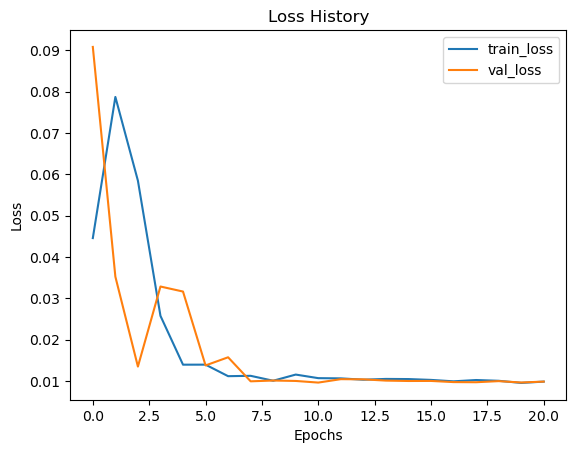

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

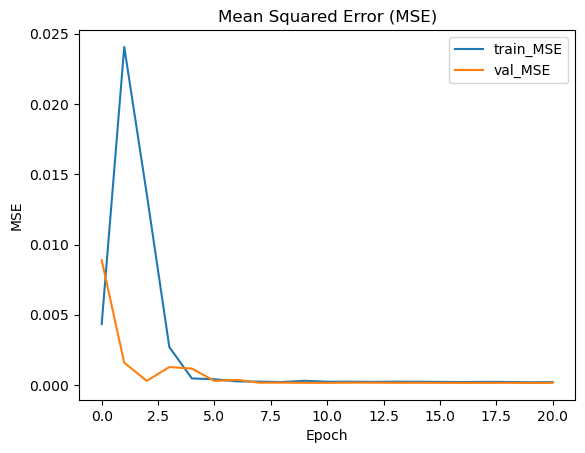

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

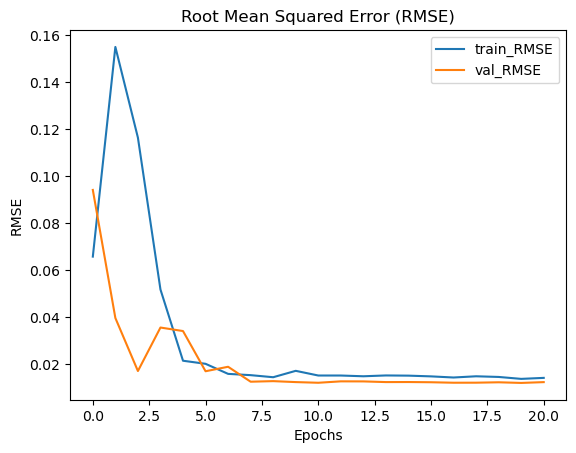

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

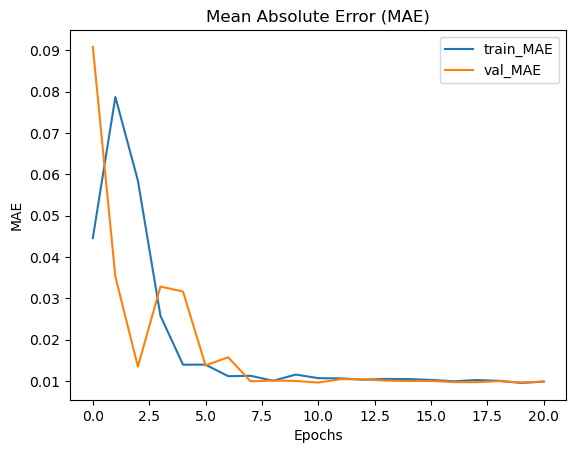

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

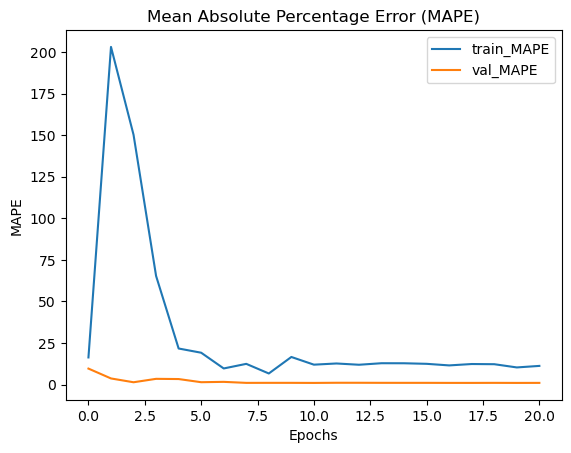

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:37:26.686038: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


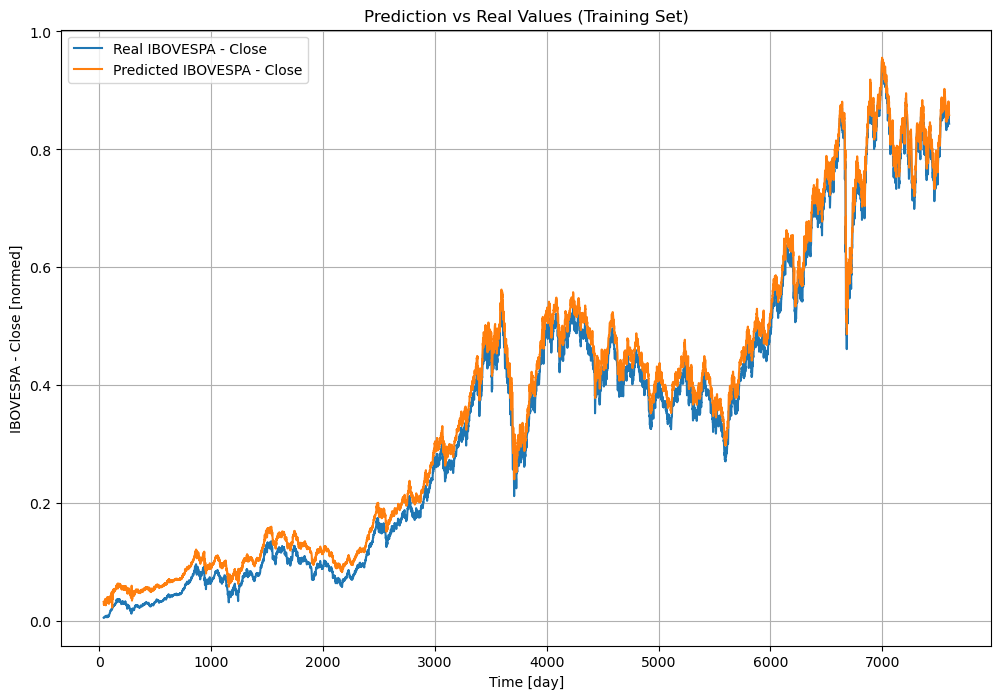

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


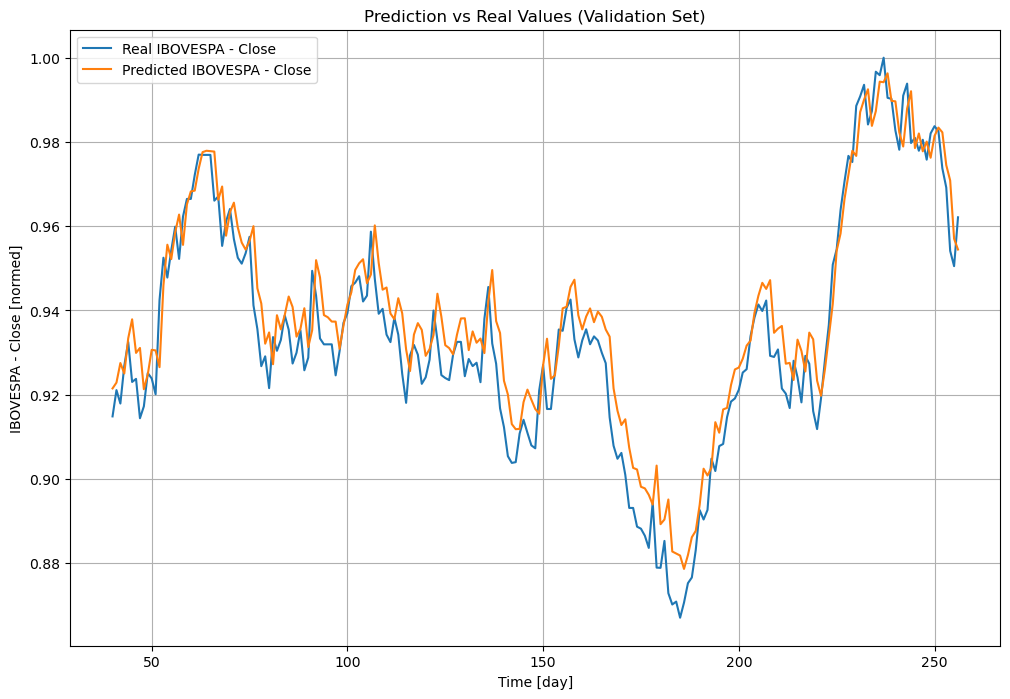

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


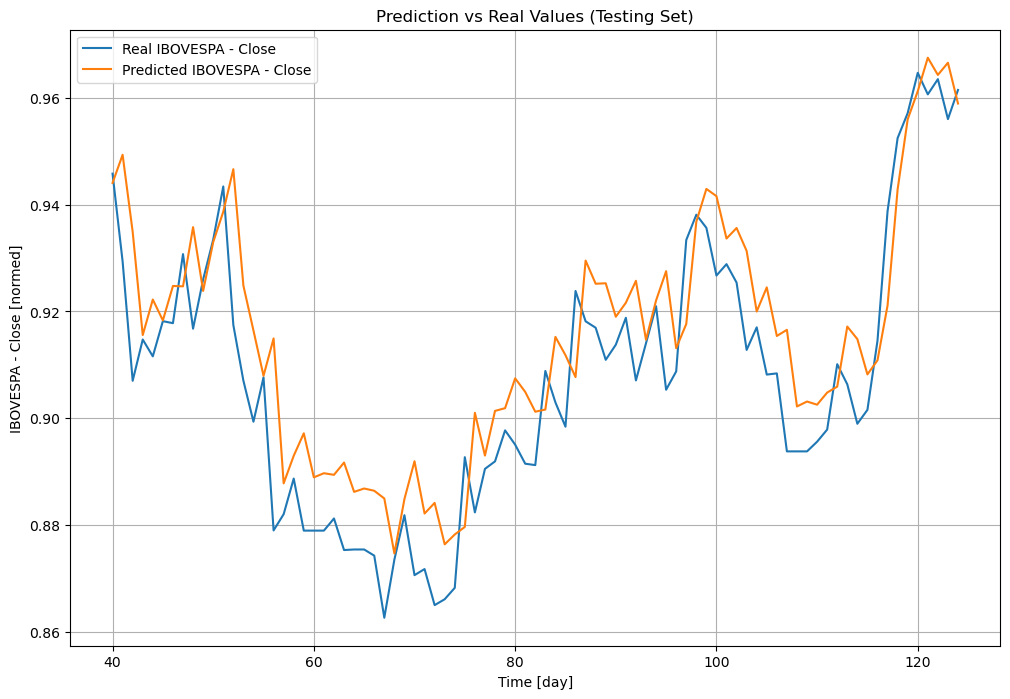

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

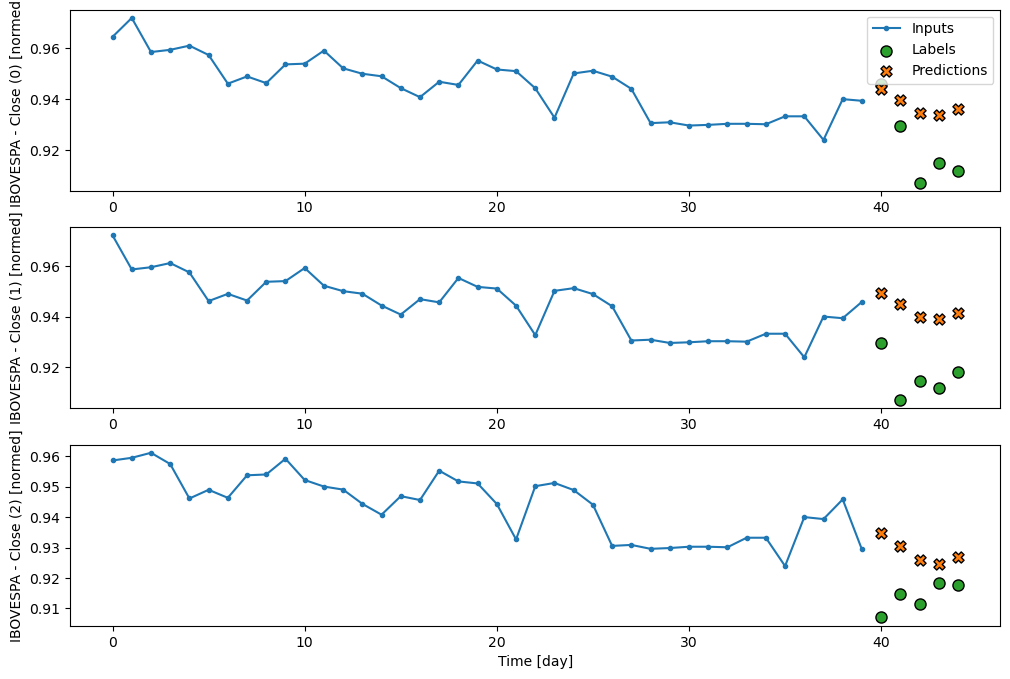

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:38s:903ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


array([[[0.9440725 , 0.9440725 , 0.9440725 , ..., 0.9440725 ,
         0.9440725 , 0.9440725 ],
        [0.93982327, 0.93982327, 0.93982327, ..., 0.93982327,
         0.93982327, 0.93982327],
        [0.93467283, 0.93467283, 0.93467283, ..., 0.93467283,
         0.93467283, 0.93467283],
        [0.9337231 , 0.9337231 , 0.9337231 , ..., 0.9337231 ,
         0.9337231 , 0.9337231 ],
        [0.9363016 , 0.9363016 , 0.9363016 , ..., 0.9363016 ,
         0.93630147, 0.93630147]],

       [[0.9493383 , 0.9493383 , 0.9493383 , ..., 0.9493383 ,
         0.9493383 , 0.9493383 ],
        [0.9451034 , 0.9451034 , 0.9451034 , ..., 0.9451034 ,
         0.9451034 , 0.9451034 ],
        [0.9397619 , 0.9397619 , 0.9397619 , ..., 0.9397619 ,
         0.9397619 , 0.9397619 ],
        [0.93883646, 0.93883646, 0.93883646, ..., 0.93883646,
         0.93883646, 0.93883646],
        [0.94146425, 0.94146425, 0.94146425, ..., 0.94146425,
         0.9414641 , 0.9414641 ]],

       [[0.9349117 , 0.9349117 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')